Meteorological data analysis

# Intro

## Libraries

In [2]:
# only the first time in a new computer

# pip install utm
# ! pip install cufflinks --upgrade
# pip install brokenaxes
# pip install chart_studio
# pip install plotly-express

  Created wheel for utm: filename=utm-0.5.0-cp37-none-any.whl size=5908 sha256=6924068719fe1dc93ac0b10fc13f5734f99b8a649c1afa5fe0078f136bfcddde
  Stored in directory: C:\Users\badria\AppData\Local\pip\Cache\wheels\22\85\c2\314ffed39b8e02ca623e9b7d2ad7fcf3f8544a0e77c096be76
Successfully built utm
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import glob
from datetime import datetime

import pandas as pd
import numpy as np
from decimal import Decimal
import collections
import time
import utm

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from brokenaxes import brokenaxes

from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

from functools import reduce

In [5]:
import string
import plotly
import chart_studio.plotly as py

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.io as pio
import plotly.figure_factory as ff
import cufflinks as cf

In [6]:
import csv
import xlrd

In [7]:
# cufflinks offline
cf.go_offline()

In [8]:
# Run at the start of every ipython notebook to use plotly.offline. This injects the plotly.js source files into the notebook.
init_notebook_mode(connected=True)

## Input 

### File input

In [38]:
path = r'C:/CicloHidrico/Datos'
os.chdir(path)

In [39]:
# DB datos procesados de lluvia y temperatura (CV y alrededores)

data = pd.read_csv("meteodata.csv", index_col=0) 

C:\Users\ceam\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning:

Columns (1,13,15) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\ceam\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [40]:
# volver a convertir Códigos a string ya que viene de csv
data.CodigoEst = data.CodigoEst.astype('str') 

In [9]:
data.describe(include='all')

,CodigoEst,Fecha,Precipitacion,ValidPP,Estacion,Tipo,Xutm,Yutm,Altura,Provincia,Umbral_20_40_km_costa,Tmaxima,ValidTmax,Tminima,ValidTmin,Year,Month,Day,dist_costa
count,9814483,9814483,9.814483e+06,9814483,9814483,9814483,9.814483e+06,9.814483e+06,9.814483e+06,9814483,9.814483e+06,3.554167e+06,3694386,3.562843e+06,3692830,9.814483e+06,9.814483e+06,9.814483e+06,9.814483e+06
unique,862,39118,NaN,3,853,4,NaN,NaN,NaN,7,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,7102,2003-04-27,NaN,S,ONTUR GRUPO ESCOLAR,INMman,NaN,NaN,NaN,V,NaN,NaN,S,NaN,S,NaN,NaN,NaN,NaN
freq,34009,531,NaN,9770922,34009,9657591,NaN,NaN,NaN,2594822,NaN,NaN,3554167,NaN,3562843,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.328469e+00,NaN,NaN,NaN,6.737372e+05,4.347105e+06,5.290456e+02,NaN,2.233426e+00,2.137944e+01,NaN,1.004954e+01,NaN,1.984084e+03,6.508101e+00,1.572790e+01,5.974007e+01
std,NaN,NaN,6.246974e+00,NaN,NaN,NaN,6.161864e+04,9.142099e+04,4.147087e+02,NaN,8.588786e-01,7.809340e+00,NaN,6.800974e+00,NaN,2.052111e+01,3.450942e+00,8.798743e+00,5.360077e+01
min,NaN,NaN,0.000000e+00,NaN,NaN,NaN,5.370000e+05,4.141490e+06,1.000000e+00,NaN,1.000000e+00,-1.500000e+01,NaN,-2.700000e+01,NaN,1.912000e+03,1.000000e+00,1.000000e+00,-1.000000e+01
25%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,6.284940e+05,4.275126e+06,1.000000e+02,NaN,1.000000e+00,1.550000e+01,NaN,5.000000e+00,NaN,1.969000e+03,4.000000e+00,8.000000e+00,1.552000e+01
50%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,6.865970e+05,4.355969e+06,5.150000e+02,NaN,3.000000e+00,2.100000e+01,NaN,1.000000e+01,NaN,1.986000e+03,7.000000e+00,1.600000e+01,4.118000e+01
75%,NaN,NaN,0.000000e+00,NaN,NaN,NaN,7.205340e+05,4.422256e+06,8.680000e+02,NaN,3.000000e+00,2.770000e+01,NaN,1.500000e+01,NaN,2.001000e+03,1.000000e+01,2.300000e+01,9.596000e+01


In [8]:
data.head()

,CodigoEst,Fecha,Precipitacion,ValidPP,Estacion,Tipo,Xutm,Yutm,Altura,Provincia,Umbral_20_40_km_costa,Tmaxima,ValidTmax,Tminima,ValidTmin,Year,Month,Day,dist_costa
0,8021A,1975-05-01,0.0,S,"AGOST, ESCOLA",INMman,705962.0,4257098.0,376.0,A,1.0,NaN,NaN,NaN,NaN,1975,5,1,16.83
1,8021A,1975-05-02,0.0,S,"AGOST, ESCOLA",INMman,705962.0,4257098.0,376.0,A,1.0,NaN,NaN,NaN,NaN,1975,5,2,16.83
2,8021A,1975-05-03,0.0,S,"AGOST, ESCOLA",INMman,705962.0,4257098.0,376.0,A,1.0,NaN,NaN,NaN,NaN,1975,5,3,16.83
3,8021A,1975-05-04,2.8,S,"AGOST, ESCOLA",INMman,705962.0,4257098.0,376.0,A,1.0,NaN,NaN,NaN,NaN,1975,5,4,16.83
4,8021A,1975-05-05,15.9,S,"AGOST, ESCOLA",INMman,705962.0,4257098.0,376.0,A,1.0,NaN,NaN,NaN,NaN,1975,5,5,16.83


### Variable input

In [ ]:
# Coordenadas geográficas (utm)

# Desembocadura ríos
desemb_jucar_x = 738463 
desemb_jucar_y = 4339071
desemb_mijar_x = 755628
desemb_mijar_y = 4421695

# Analysis

## General info / plotting

In [ ]:
est = pd.read_excel("EstacionesCHJ09_2019.xlsx",index_col=0)  # con las dist_costa

In [ ]:
est_XYutm = est[['Xutm','Yutm','Altura']]  # datos geográficos de estaciones CHJ
# est_XYutm#.reset_index(drop=True,inplace=True)                                  

In [ ]:
est_XYutm.head(3)

In [ ]:
# txt con los datos geográficos para importar en Surfer
f = open('est_XYutm.txt','w') 
f.write(est_XYutm.to_string())
f.close()

In [ ]:
len(est.CodigoEst.unique())

### Pivot table

In [14]:
# multiindex dataframe

pivot_data = pd.pivot_table(data, values='Precipitacion', index=['Year', 'Month', 'Day', 'Fecha'],
                            columns=['Provincia', 'Estacion', 'CodigoEst', 'Xutm', 'Yutm', 'Altura', 'dist_costa'])

In [ ]:
pivot_data[30060:30090]

In [16]:
pivot_data.index.get_level_values(0)

Int64Index([1912, 1912, 1912, 1912, 1912, 1912, 1912, 1912, 1912, 1912,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='Year', length=39118)

In [ ]:
# Número de días de lluvia en cada estación
pivot_data[pivot_data>0].count()

# Porcentaje de días de lluvia vs días con datos, en cada estación
pivot_data[pivot_data>0].count()*100/pivot_data.count()

# Media de los porcentajes de días de lluvia vs días con datos
(pivot_data[pivot_data>0].count()*100/pivot_data.count()).mean()

In [ ]:
pivot_data.max()           # máxima lluvia en un día para cada estación
pivot_data.max().mean()    # media de los valores máximos

In [ ]:
# información días de lluvia

pivot_data[pivot_data>0].mean()              # medias de lluvia diaria (sin contar los días que no llueve) por estación
pivot_data[pivot_data>0].mean().mean()       # media de las medias de lluvia diaria (sin contar los días que no llueve)

In [ ]:
pivot_data[pivot_data>0].describe()          # información SÓLO contando los días de lluvia por estacón
pivot_data[pivot_data>0].describe().mean(axis=1)          # medias de la información de los días de lluvia

In [ ]:
# datos de precipitación en un multiindex df de 1 COLUMNA 
pivot_col1 =  pd.pivot_table(data,values='Precipitacion', index=
                            ['Provincia','Estacion','CodigoEst','Year','Month','Day','Fecha'])

In [ ]:
# medias de precipitación por año
group = pivot_col1.groupby(['Provincia','Estacion','CodigoEst','Year']).mean()

In [ ]:
# regular dataframe, not multiindex
group=group.reset_index()

In [ ]:
group.tail()

In [17]:
# otra manera de sacar las medias de lluvia por año (finalmente no utilizado)

pivot_data.columns.get_level_values('Provincia')
pivot_yearmeans = pivot_data.sort_values(by='dist_costa',axis=1).mean(level='Year')
pivot_yearmeans.tail()

Provincia                   MU                C          V  \
Estacion   AGUILAS, DIPUTACION ALMASSORA, POBLE MASSANASSA   
CodigoEst                 7002             8500      8342E   
Xutm                  625377.0         749463.0   726591.0   
Yutm                 4141490.0        4426368.0  4255308.0   
Altura                  20.0             31.0       11.0     
dist_costa             -10.00            0.00       0.00     
Year                                                         
2015                       NaN              NaN        NaN   
2016                       NaN              NaN        NaN   
2017                       NaN              NaN        NaN   
2018                       NaN              NaN        NaN   
2019                       NaN              NaN        NaN   

Provincia                    A                        C  \
Estacion   CALP, PENYO DE IFAC IILLES COLUMBRETES, FARO   
CodigoEst                8043G                     8531   
Xutm                  767666.0                 815077.0   
Yutm                 4281017.0                4422867.0   
Altura                  110.0                    40.0     
dist_costa              0.10                     0.10     
Year                                                      
2015                  0.961318                 1.548780   
2016                  0.764326                 1.045954   
2017                  0.854335                 0.754704   
2018                  1.550321                 1.571141   
2019                       NaN                      NaN   

Provincia                        V                         C                  \
Estacion   VALENCIA, FORN D'ALCEDO BENICARLO, RAMBLA CERVERA VINAROS, C.H.J.   
CodigoEst                     8344                     8512E           8515A   
Xutm                      726247.0                  791652.0        794907.0   
Yutm                     4368238.0                 4480313.0       4486372.0   
Altura                      8.0                       8.0             6.0      
dist_costa                  0.10                      0.10            0.14     
Year                                                                           
2015                           NaN                  1.985625             NaN   
2016                           NaN                  1.146903             NaN   
2017                           NaN                  0.637283             NaN   
2018                           NaN                  2.369591             NaN   
2019                           NaN                       NaN             NaN   

Provincia                   A               C  ...                        CU  \
Estacion   CAP DE SANT ANTONI BENICARLO, IVIA  ... VILLAR DEL SAZ DE NAVALON   
CodigoEst                8051           IVI02  ...                      3070   
Xutm                 777916.0        791320.0  ...                  555202.0   
Yutm                4299521.0       4479744.0  ...                 4444375.0   
Altura                 163.0           10.0    ...                    984.0    
dist_costa             0.14            0.20    ...                    186.00   
Year                                           ...                             
2015                      NaN             NaN  ...                       NaN   
2016                      NaN             NaN  ...                       NaN   
2017                      NaN             NaN  ...                       NaN   
2018                      NaN             NaN  ...                       NaN   
2019                      NaN             NaN  ...                       NaN   

Provincia                                   AB               CU            \
Estacion   VILLAR DE DOMINGO GARCIA EL BONILLO VILLARES DEL SAZ             
CodigoEst                      3076       4002            4075Y      4075   
Xutm                       559971.0   540150.0         542494.0  542281.0   
Yutm                      4454587.0

### Estaciones activas en función del tiempo

In [ ]:
pivot_data.loc[(1960,9),('V','ABEJUELA')]

In [ ]:
# DEFINICIONES
# número de estaciones en cada província

l_A = len(est[est.Provincia=='A'])
l_AB = len(est[est.Provincia=='AB'])
l_C = len(est[est.Provincia=='C'])
l_CU = len(est[est.Provincia=='CU'])
l_MU = len(est[est.Provincia=='MU'])
l_TE = len(est[est.Provincia=='TE'])
l_V = len(est[est.Provincia=='V'])

l_A+l_AB+l_C+l_CU+l_MU+l_TE+l_V

In [ ]:
est.Provincia.unique()

In [ ]:
# Mapa de calor: 862 estaciones vs 108 years
# Interactivo

# Alacant
traceA = go.Heatmap(z=group.Precipitacion[group.Provincia=='A'],
                    x=group.Year[group.Provincia=='A'], y=group.Estacion[group.Provincia=='A'],
                   
                    colorscale=[[0, 'rgb(255,0,0)'],[1, 'rgb(255,0,0)']],showscale=False
                   )
# Albacete
traceAB = go.Heatmap(z=group.Precipitacion[group.Provincia=='AB'],
                     x=group.Year[group.Provincia=='AB'], y=group.Estacion[group.Provincia=='AB'],
                    yaxis='y2',
                     colorscale=[[0, 'rgb(125, 60, 152)'],[1, 'rgb(125, 60, 152)']],showscale=False
                    )
# Castelló
traceC = go.Heatmap(z=group.Precipitacion[group.Provincia=='C'],
                     x=group.Year[group.Provincia=='C'], y=group.Estacion[group.Provincia=='C'],
                    yaxis='y3',
                     colorscale=[[0, 'rgb(46, 134, 193)'],[1, 'rgb(46, 134, 193)']],showscale=False
                    )
# Cuenca
traceCU = go.Heatmap(z=group.Precipitacion[group.Provincia=='CU'],
                     x=group.Year[group.Provincia=='CU'], y=group.Estacion[group.Provincia=='CU'],
                    yaxis='y4',
                     colorscale=[[0, 'rgb(40, 180, 99)'],[1, 'rgb(40, 180, 99)']],showscale=False
                    )
# Murcia
traceMU = go.Heatmap(z=group.Precipitacion[group.Provincia=='MU'],
                     x=group.Year[group.Provincia=='MU'], y=group.Estacion[group.Provincia=='MU'],
                    yaxis='y5',
                     colorscale=[[0, 'rgb(241, 196, 15)'],[1, 'rgb(241, 196, 15)']],showscale=False
                    )
# Teruel
traceTE = go.Heatmap(z=group.Precipitacion[group.Provincia=='TE'],
                     x=group.Year[group.Provincia=='TE'], y=group.Estacion[group.Provincia=='TE'],
                    yaxis='y6',
                     colorscale=[[0, 'rgb(255,102,0)'],[1, 'rgb(255, 102, 0)']],showscale=False  #211, 84, 0
                    )
# València
traceV = go.Heatmap(z=group.Precipitacion[group.Provincia=='V'],
                     x=group.Year[group.Provincia=='V'], y=group.Estacion[group.Provincia=='V'],
                    yaxis='y7',
                     colorscale=[[0, 'rgb(102, 51, 0)'],[1, 'rgb(102, 51, 0)']],showscale=False
                    )

layout = go.Layout(
    height = 750,
    title =dict(text='Active stations in function of time',font=dict(size=30)),
    xaxis = dict(title='Año', ticks='outside',range=[1910,2020], nticks=12, position=0, 
                 titlefont=dict(size=30), tickfont=dict(size=20)),       # shared x axis
    
    yaxis = dict(title='Alacant',side='left',ticks='',tickmode='array',tickvals=[],     # alacant
                 domain=[1-l_A/len(est),1], autorange='reversed',titlefont=dict(size=30)),                           
    yaxis2 = dict(title='AB',side='left',ticks='',tickmode='array',tickvals=[],         # albacete 
                  domain=[1-(l_A+l_AB)/len(est),1-(l_A)/len(est)],autorange='reversed'),
    yaxis3 = dict(title='Castelló',side='left',ticks='',tickmode='array',tickvals=[],   # castelló
                    domain=[1-(l_A+l_AB+l_C)/len(est),1-(l_A+l_AB)/len(est)],autorange='reversed',titlefont=dict(size=30)),            
    yaxis4 = dict(title='CU',side='left',ticks='',tickmode='array',tickvals=[],         # cuenca 
                    domain=[1-(l_A+l_AB+l_C+l_CU)/len(est),1-(l_A+l_AB+l_C)/len(est)],autorange='reversed'),
    yaxis5 = dict(title='MU',side='left',ticks='',tickmode='array',tickvals=[],         # murcia
                    domain=[1-(l_A+l_AB+l_C+l_CU+l_MU)/len(est),1-(l_A+l_AB+l_C+l_CU)/len(est)],autorange='reversed'),
    yaxis6 = dict(title='TE',side='left',ticks='',tickmode='array',tickvals=[],         # teruel
                    domain=[1-(l_A+l_AB+l_C+l_CU+l_MU+l_TE)/len(est),1-(l_A+l_AB+l_C+l_CU+l_MU)/len(est)],autorange='reversed'),
    yaxis7 = dict(title='València',side='left',ticks='',tickmode='array',tickvals=[],   # valencia
                    domain=[0,1-(l_A+l_AB+l_C+l_CU+l_MU+l_TE)/len(est)],autorange='reversed',titlefont=dict(size=30)),
                )

d=[traceA,traceAB,traceC,traceCU,traceMU,traceTE,traceV]

fig = go.Figure(d, layout)

iplot(fig)

In [ ]:
pio.write_image(fig, 'images/general/estacionesactivas.png', format='png', width=1000, height=700)

In [ ]:
# facet_grid didn't work, I used go.Heatmap
# fig = ff.create_facet_grid(
#     group,
#     x='Year',
#     y='Estacion',
#     facet_row='Provincia',
#     color_name='Provincia',
#     color_is_cat=True)

# fig.layout.xaxis.update({'nticks':12,'title':'Año'})
# fig.layout.yaxis.update({ 'nticks':1,'domain': [0.9, 1],'title': 'Estacion'})
# fig.layout.update({'title':'Active stations by year',
#                    ''
#                    'height':800,'width':1000
#                   })
# iplot(fig)

### Número de estaciones por año

In [ ]:
stat_year = group.groupby('Year').count()

In [ ]:
d = [go.Histogram(histfunc="count",
                  x=group.Year,
                  y=group.Precipitacion,
                  )]
layout = go.Layout(
    title=dict(text='Número de estaciones activas por año',font=dict(size=30)),
    xaxis=dict(
        title='Año', titlefont=dict(size=30), tickfont=dict(size=20),
        ticks='outside', nticks=12, showgrid=True, gridcolor="#444"
    ),
    yaxis=dict(
        title='Count', titlefont=dict(size=30), tickfont=dict(size=20),
        showgrid=True, gridcolor="#444"
    ),
    bargap=0.2,
    bargroupgap=0.1)

fig = go.Figure(d, layout)

iplot(fig)

In [ ]:
pio.write_image(fig, 'images/general/histo_activestatnum.png', format='png', width=1000, height=600)

### Número de evento de lluvia por bins

In [ ]:
pivot_col1.head()

In [ ]:
d = [go.Histogram(histfunc="count",
                  x=pivot_col1.Precipitacion[(pivot_col1.Precipitacion > 0)  # &(pivot_col1.Precipitacion<100)
                                             ],
                  marker=dict(color='rgb(211, 84, 0)'),
                  nbinsx=200,
                  histnorm='probability'
                  )]
layout = go.Layout(
    title='Número de episodios de lluvia por intervalo',
    xaxis=dict(
        title='Cantidad de lluvia (mm)', ticks='outside', nticks=12, showgrid=True, gridcolor="#444"
    ),
    yaxis=dict(
        title='Count', showgrid=True, gridcolor="#444"
    ),
    bargap=0.2,
    #    bargroupgap=0.1
)

fig = go.Figure(d, layout)

iplot(fig)

In [ ]:
pio.write_image(fig, 'images/general/histo_rainbins.png'#, format='png', width=1200, height=600
               )

In [ ]:
d = [go.Histogram(histfunc = "count",
                     x=pivot_col1.Precipitacion[(pivot_col1.Precipitacion>0)&(pivot_col1.Precipitacion<100)
                                               ],
                     marker=dict(color='rgb(240, 0, 0)'),
                     nbinsx = 20,
                     histnorm='probability'
                    )]
layout = go.Layout(
    title='Número de episodios de lluvia (<100mm) por intervalo',
    xaxis=dict(
        title='Cantidad de lluvia (mm)',ticks = 'outside',nticks=12,showgrid=True,gridcolor="#444"
    ),
    yaxis=dict(
        title='Count',showgrid=True,gridcolor="#444"
    ),
    bargap=0.2,
#    bargroupgap=0.1
)

fig = go.Figure(d, layout)   

iplot(fig)

In [ ]:
pio.write_image(fig, 'images/general/histo_rainbins_subset.png'#, format='png', width=1200, height=600
               )

### Lluvia en función de la distancia a la costa

1. add dist_costa to pivot_table 
2. sort_values by dist_costa, codigoest
3. get mean values per year, per station


In [ ]:
data.groupby(['Year','CodigoEst']).mean().loc[2002].sort_values(by=['dist_costa'])

In [ ]:
data.groupby(['Year', 'CodigoEst']).mean(
)#.loc[1999].sort_values(by=['dist_costa'])

## Subsets 

### Siglo XXI

In [159]:
# data to be used ONLY for classification : 2000-2016
# stations selected with continuous data = 172

pivot_data_00to18 = pivot_data[(pivot_data.index.get_level_values(0)>1999)
                              & (pivot_data.index.get_level_values(0)<2019)] # all data from 2000 to 2018, both incl.

pivot_data_00to18 = pivot_data_00to18.dropna(thresh=len(pivot_data_00to18)*0.98,axis=1) # drop stations with + than 5% NaN
pivot_data_00to18

Provincia                                     A                   \
Estacion                  ALACANT, CIUTAT JARDI ALACANT, L'ALTET   
CodigoEst                                  8025             8019   
Xutm                                   718412.0         713885.0   
Yutm                                  4249898.0        4240151.0   
Altura                                   82.0             31.0     
dist_costa                                3.34             3.10    
Year Month Day Fecha                                               
2000 1     1   2000-01-01                   0.0              0.0   
           2   2000-01-02                   0.0              0.0   
           3   2000-01-03                   0.0              0.0   
           4   2000-01-04                   0.0              0.0   
           5   2000-01-05                   0.0              0.0   
           6   2000-01-06                   0.0              0.0   
           7   2000-01-07                   0.0              0.0   
           8   2000-01-08                   0.0              0.0   
           9   2000-01-09                   0.8              1.5   
           10  2000-01-10                  13.4             13.8   
           11  2000-01-11                   1.7              5.3   
           12  2000-01-12                   0.0              0.0   
           13  2000-01-13                   0.0              0.4   
           14  2000-01-14                  17.7             12.1   
           15  2000-01-15                   1.3              3.8   
           16  2000-01-16                   0.0              0.2   
           17  2000-01-17                   0.0              0.0   
           18  2000-01-18                   0.0              0.0   
           19  2000-01-19                   0.0              0.0   
           20  2000-01-20                   0.0              0.0   
           21  2000-01-21                   0.0              0.0   
           22  2000-01-22                   0.0              0.0   
           23  2000-01-23                   0.0              0.0   
           24  2000-01-24                   0.0              0.0   
           25  2000-01-25                   0.0              0.0   
           26  2000-01-26                   0.0              0.0   
           27  2000-01-27                   0.0              0.0   
           28  2000-01-28                   0.0              0.0   
           29  2000-01-29                   0.0              0.0   
           30  2000-01-30                   0.0              0.0   
...                                         ...              ...   
2018 12    2   2018-12-02                   0.0              0.0   
           3   2018-12-03                   0.0              0.0   
           4   2018-12-04                   0.0              0.0   
           5   2018-12-05                   0.0              0.0   
           6   2018-12-06                   0.0              0.0   
           7   2018-12-07                   0.0              0.0   
           8   2018-12-08                   0.0              0.0   
           9   2018-12-09                   0.0              0.0   
           10  2018-12-10                   0.0              0.0   
           11  2018-12-11                   0.0              0.0   
           12  2018-12-12                   0.0              0.0   
           13  2018-12-13                   7.4             10.0   
           14  2018-12-14                   0.0              0.0   
           15  2018-12-15                   0.0              0.0   
           16  2018-12-16                   0.0              0.0   
           17  2018-12-17                   0.0              0.0   
           18  2018-12-18                   0.0              0.0   
           19  2018-12-19                   0.0              0.0   
           20  2018-12-20                   0.0              0.0   
           21  2018-12-21                   0.0         

(array([16.,  1., 20.,  7., 18.,  9., 11.,  9., 11.,  8.]),
 array([0.   , 0.199, 0.398, 0.597, 0.796, 0.995, 1.194, 1.393, 1.592,
        1.791, 1.99 ]),
 <a list of 10 Patch objects>)

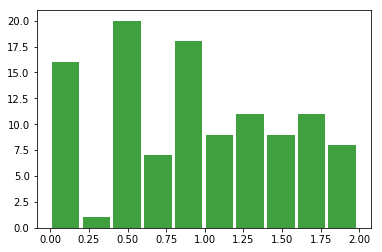

In [165]:
# histograma con numero de estaciones con num NaNs < 10% vs bins de 1%
a = pivot_data_00to18.isna().mean().round(4)*100   # percentage of NaN values in each selected station (always less than 10 %)
plt.hist(a, 10, density=False, facecolor='g', alpha=0.75, rwidth=0.9)

In [161]:
a

Provincia  Estacion                        CodigoEst  Xutm      Yutm       Altura  dist_costa
A          ALACANT, CIUTAT JARDI           8025       718412.0  4249898.0  82.0    3.34          0.00
           ALACANT, L'ALTET                8019       713885.0  4240151.0  31.0    3.10          0.14
           ALBATERA, AJUNTAMENT            7254E      688282.0  4229706.0  14.0    19.61         1.89
           ALMUDAINA                       8066       729854.0  4293724.0  586.0   29.13         1.34
           CALLOSA DEL SEGURA              7256       685033.0  4220625.0  19.0    19.76         0.58
           CASTALLA, AYUNTAMIENTO          8027A      703044.0  4274576.0  670.0   28.88         1.41
           EL PINOS, C.P. SANTA CATALINA   7247E      671368.0  4252554.0  575.0   45.02         0.84
           EL PINOS, CHS                   7247       670286.0  4252069.0  574.0   45.68         0.78
           ELX, AGULLO                     8018A      700323.0  4237953.0  86.0    13.16  

In [109]:
pivot_data_00to18.iloc[:,[0,16]]

Provincia                             A                 
Estacion                  AGOST, ESCOLA ELDA, AJUNTAMENT
CodigoEst                         8021A            8011A
Xutm                           705962.0         692671.0
Yutm                          4257098.0        4261950.0
Altura                            376.0            390.0
dist_costa                        16.83            30.15
Year Month Day Fecha                                    
2000 1     1   2000-01-01           0.0              0.0
           2   2000-01-02           0.0              0.0
           3   2000-01-03           0.0              0.0
           4   2000-01-04           0.0              0.0
           5   2000-01-05           0.0              0.0
           6   2000-01-06           0.0              0.0
           7   2000-01-07           0.0              0.0
           8   2000-01-08           0.0              0.0
           9   2000-01-09           0.0              0.2
           10  2000-01-10           7.5              2.5
           11  2000-01-11           0.0              0.0
           12  2000-01-12           0.0              0.0
           13  2000-01-13          10.0              0.0
           14  2000-01-14          12.0             12.0
           15  2000-01-15           2.5              0.0
           16  2000-01-16           0.0              2.2
           17  2000-01-17           0.0              0.0
           18  2000-01-18           0.0              0.0
           19  2000-01-19           0.0              0.0
           20  2000-01-20           0.0              0.0
           21  2000-01-21           0.0              0.0
           22  2000-01-22           0.0              0.0
           23  2000-01-23           0.0              0.0
           24  2000-01-24           0.0              0.0
           25  2000-01-25           0.0              0.0
           26  2000-01-26           0.0              0.0
           27  2000-01-27           0.0              0.0
           28  2000-01-28           0.0              0.0
           29  2000-01-29           0.0              0.0
           30  2000-01-30           0.0              0.0
...                                 ...              ...
2018 12    2   2018-12-02           NaN              0.0
           3   2018-12-03           NaN              0.0
           4   2018-12-04           NaN              0.0
           5   2018-12-05           NaN              0.0
           6   2018-12-06           NaN              0.0
           7   2018-12-07           NaN              0.0
           8   2018-12-08           NaN              0.0
           9   2018-12-09           NaN              0.0
           10  2018-12-10           NaN              0.0
           11  2018-12-11           NaN              0.0
           12  2018-12-12           NaN              0.0
           13  2018-12-13           NaN              0.0
           14  2018-12-14           NaN              0.0
           15  2018-12-15           NaN              0.0
           16  2018-12-16           NaN              0.0
           17  2018-12-17           NaN              0.0
           18  2018-12-18           NaN              0.0
           19  2018-12-19           NaN              0.0
           20  2018-12-20           NaN              0.0
           21  2018-12-21           NaN              0.0
           22  2018-12-22           NaN              0.0
           23  2018-12-23           NaN              0.0
           24  2018-12-24           NaN              0.0
           25  2018-12-25           NaN              0.0
           26  2018-12-26           NaN              0.0
           27  2018-12-27           NaN              0.0
           28  2018-12-28           NaN              0.0
           29  2018-12-29           NaN              0.0
           30  2018-12-30           NaN              0.0
           31  2018-12-31           NaN              0.0

[6940 rows x 2 columns]

In [164]:
s = pivot_data_00to18.iloc[:,3].isna().groupby(pivot_data_00to18.iloc[:,3].notna().cumsum()).sum()
s = s[s!=0]
s

b = pd.cut(s, bins=[0, 5, 31, 92, np.inf], 
           labels=['Menos de 6 días','Entre 6 días y 1 mes','Entre 1 y 3 meses','Más de 3 meses'])
out = b.groupby(b).size().reset_index(name='Casos')
print (out)
print (s)

  (A, ALMUDAINA, 8066, 729854.0, 4293724.0, 586.0, 29.13)  Casos
0                                    Menos de 6 días          16
1                               Entre 6 días y 1 mes           2
2                                  Entre 1 y 3 meses           0
3                                     Más de 3 meses           0
(A, ALMUDAINA, 8066, 729854.0, 4293724.0, 586.0, 29.13)
1004     2.0
1009     2.0
1136     2.0
1177     2.0
1214     2.0
1331     2.0
2329     2.0
2463     2.0
2528     2.0
3369     2.0
3626     2.0
4321     2.0
5082     2.0
5394     2.0
5480     2.0
5753     2.0
6421    30.0
6847    31.0
Name: (A, ALMUDAINA, 8066, 729854.0, 4293724.0, 586.0, 29.13), dtype: float64


In [166]:
columns = list(pivot_data_00to18) 
  
for i in columns: 
  
    s = pivot_data_00to18[i].isna().groupby(pivot_data_00to18[i].notna().cumsum()).sum()
    s = s[s!=0]
    s

    print (s.max()) 

nan
10.0
31.0
31.0
31.0
31.0
31.0
31.0
2.0
31.0
3.0
31.0
61.0
31.0
91.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
5.0
4.0
31.0
31.0
31.0
31.0
31.0
nan
2.0
31.0
31.0
31.0
31.0
2.0
2.0
31.0
31.0
2.0
20.0
31.0
31.0
3.0
31.0
31.0
6.0
31.0
nan
31.0
31.0
30.0
31.0
31.0
30.0
31.0
31.0
31.0
31.0
31.0
31.0
8.0
31.0
31.0
30.0
31.0
2.0
4.0
nan
31.0
6.0
4.0
30.0
31.0
31.0
30.0
31.0
2.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
nan
31.0
13.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
31.0
4.0
31.0


In [18]:
# mean values per year
pivot_yearmeans_00to18 = pivot_data_00to18.sort_values(by='dist_costa',axis=1).mean(level='Year')
pivot_yearmeans_00to18

Provincia                    A                 V         C  \
Estacion   CALP, PENYO DE IFAC OLIVA, AJUNTAMENT ALMASSORA   
CodigoEst                8043G             8058C     8500A   
Xutm                  767666.0          751770.0  750198.0   
Yutm                 4281017.0         4312753.0 4426391.0   
Altura                  110.0             5.0       35.0     
dist_costa              0.10              0.30      0.50     
Year                                                         
2000                  1.469945          1.248634  1.527049   
2001                  1.173973          1.338356  1.216164   
2002                  1.501096          2.180441  1.237534   
2003                  1.310448          1.988767  1.586301   
2004                  1.408743          2.464481  1.727869   
2005                  0.811781          0.920548  1.276438   
2006                  1.373973          1.829448  1.340274   
2007                  1.840361          2.197721  1.667671   
2008                  0.882317          2.119088  1.151366   
2009                  1.956474          2.188385  1.556438   
2010                  1.136712          1.524345  1.059726   
2011                  1.101105          1.487143  1.405753   
2012                  1.011475          1.504972  0.810383   
2013                  0.846849          1.224620  0.890959   
2014                  0.559452          0.546814  0.785753   
2015                  0.921703          1.725141  1.242192   
2016                  0.651923          1.098615  1.164481   
2017                  0.809863          1.218457  0.904658   
2018                  1.448204          1.762534  1.794247   

Provincia                                                 A            \
Estacion   BORRIANA, SINDICATO DE RIEGOS BENIDORM, AQUAGEST LA MARINA   
CodigoEst                          8456A              8036B      7263   
Xutm                            750709.0           750108.0  706717.0   
Yutm                           4423877.0          4269614.0 4224695.0   
Altura                            22.0               10.0      20.0     
dist_costa                        0.54               0.54      0.63     
Year                                                                    
2000                            1.402732           0.749850  0.481421   
2001                            1.254420           1.017906  1.124242   
2002                            1.403562           0.983056  0.498329   
2003                            1.511570           1.043802  0.709917   
2004                            1.754098           0.818750  0.911202   
2005                            1.235813           0.934884  0.585205   
2006                            1.269697           1.252239  0.835890   
2007                            1.793352           2.257808  1.420386   
2008                            1.159563           0.968320  0.908197   
2009                            1.853425           1.096677  1.463836   
2010                            1.192329           1.038356  1.061813   
2011                            1.585809           1.144384  0.792329   
2012                            0.811976           0.670166  0.713973   
2013                            0.987671           0.769863  0.575904   
2014                            0.900000           0.474656  0.434986   
2015                            1.212329           0.683747  0.561370   
2016                            1.200549           0.807418  0.822802   
2017                            1.020548           1.063562  0.681928   
2018                            1.984932           1.056438  1.101497   

Provincia                             V             A                    \
Estacion   CULLERA, MARENY SANT LLORENC XABIA ,VIVERS XABIA, AJUNTAMENT   
CodigoEst                         8328B         8050A             8050E   
Xutm                           737021.0      775135.0          775105.0   
Yutm                          4344486.0     4298189.0

In [ ]:
# # mean rain per year for the period 2000-2018, in the stations where some data exist every year 
# yearmeans_00to18 = pivot_yearmeans[(pivot_yearmeans.index > 1999) & (
#     pivot_yearmeans.index < 2019)].dropna(how='any', axis=1)  # .count()#.mean()
# yearmeans_00to18

#### UTM: map for surfer

In [19]:
pivot_yearmeans_00to18.unstack().reset_index().drop_duplicates(subset='CodigoEst')

,Provincia,Estacion,CodigoEst,Xutm,Yutm,Altura,dist_costa,Year,0
0,A,"CALP, PENYO DE IFAC",8043G,767666.0,4281017.0,110.0,0.10,2000,1.469945
19,V,"OLIVA, AJUNTAMENT",8058C,751770.0,4312753.0,5.0,0.30,2000,1.248634
38,C,ALMASSORA,8500A,750198.0,4426391.0,35.0,0.50,2000,1.527049
57,C,"BORRIANA, SINDICATO DE RIEGOS",8456A,750709.0,4423877.0,22.0,0.54,2000,1.402732
76,A,"BENIDORM, AQUAGEST",8036B,750108.0,4269614.0,10.0,0.54,2000,0.749850
95,A,LA MARINA,7263,706717.0,4224695.0,20.0,0.63,2000,0.481421
114,V,"CULLERA, MARENY SANT LLORENC",8328B,737021.0,4344486.0,5.0,1.12,2000,1.100000
133,A,"XABIA ,VIVERS",8050A,775135.0,4298189.0,30.0,1.24,2000,1.354121
152,A,"XABIA, AJUNTAMENT",8050E,775105.0,4297663.0,15.0,1.33,2000,1.358197
171,V,"MIRAMAR, AYUNTAMIENTO",8058F,747975.0,4315349.0,14.0,1.41,2000,1.240710


In [20]:
est_00to18 = pivot_yearmeans_00to18.unstack().reset_index().drop_duplicates(subset='CodigoEst')[
    ['CodigoEst','Xutm','Yutm','Altura']]
est_00to18.index.name = 'foo'
est_00to18.head(3)

,CodigoEst,Xutm,Yutm,Altura
foo,,,,
0,8043G,767666.0,4281017.0,110.0
19,8058C,751770.0,4312753.0,5.0
38,8500A,750198.0,4426391.0,35.0


In [21]:
est_00to18.CodigoEst.head()

foo
0     8043G
19    8058C
38    8500A
57    8456A
76    8036B
Name: CodigoEst, dtype: object

In [24]:
# selección de estaciones con datos continuos en 2000-2018 dentro de la CHJ
M = 1000000
estCHJ_00to18 = est_00to18[(est_00to18.Xutm>0.68*M)|(est_00to18.Yutm>4.28*M)]           # deja fuera algunas de Albacete 
estCHJ_00to18 = estCHJ_00to18[(estCHJ_00to18.Xutm>0.695*M)|(estCHJ_00to18.Yutm>4.24*M)] # deja fuera alguna de Alacant
estCHJ_00to18 = estCHJ_00to18[estCHJ_00to18.Yutm<4.51*M]                                # deja fuera alguna de Teruel

In [25]:
# txt con los datos geográficos para importar en Surfer
f = open('estCHJ_00to18.txt','w') 
f.write(estCHJ_00to18.to_string())
f.close()

In [22]:
# txt con los datos geográficos para importar en Surfer
f = open('est_00to18.txt','w') 
f.write(est_00to18.to_string())
f.close()

In [24]:
with pd.ExcelWriter('est00to16.xlsx') as writer:  # doctest: +SKIP
    est_00to16.to_excel(writer, sheet_name='est_00to16')

### Años 1979-2018

In [ ]:
# medias de precipitación diarias por año, en el periodo indicado, ordenadas por dist a la costa
pivot_yearmeans[(pivot_yearmeans.index>1978)&(pivot_yearmeans.index<2019)]

In [ ]:
# mean rain per year for the last 40 years, in the stations where data were continuous
yearmeans_79to18 = pivot_yearmeans[(pivot_yearmeans.index > 1978) & (
    pivot_yearmeans.index < 2019)].dropna(how='any', axis=1)  # .count()#.mean()
yearmeans_79to18

In [ ]:
# medias de los anteriores valores medios cuando se agrupan los años de 10 en 10 
decademeans40 = yearmeans_79to18.groupby(pd.cut(yearmeans_79to18.index, np.arange(1978, 2019, 10))).mean()

In [ ]:
# valores para el scatter plot

x0 = decademeans40.columns.get_level_values('dist_costa')#.values#.reshape(-1, 1) # distancia de la estación a la costa
x1 = decademeans40.columns.get_level_values('Estacion')   # estaciones con datos continuos los últimos 40 años

y0 = decademeans40.iloc[0]         # años 79-88
y1 = decademeans40.iloc[1]         # años 89-98  
y2 = decademeans40.iloc[2]         # años 99-08
y3 = decademeans40.iloc[3]         # años 09-18

In [ ]:
# cambio de formato para la regresión lineal

x00 = decademeans40.columns.get_level_values('dist_costa').values.reshape(-1, 1) # distancia de la estación a la costa


y00 = decademeans40.iloc[0].values.reshape(-1, 1)         # años 79-88
y11 = decademeans40.iloc[1].values.reshape(-1, 1)         # años 89-98  
y22 = decademeans40.iloc[2].values.reshape(-1, 1)         # años 99-08
y33 = decademeans40.iloc[3].values.reshape(-1, 1)         # años 09-18

In [ ]:
# regresiones lineales

lm = LinearRegression()

lm.fit(x00,y00)
y00_pred = lm.predict(x00)

lm.fit(x00,y11)
y11_pred = lm.predict(x00)

lm.fit(x00,y22)
y22_pred = lm.predict(x00)

lm.fit(x00,y33)
y33_pred = lm.predict(x00)

In [ ]:
# vuelta al formato anterior (Series) para plottear

my_list = map(lambda x: x[0], y00_pred)
y00_pred = pd.Series(my_list)

my_list = map(lambda x: x[0], y11_pred)
y11_pred = pd.Series(my_list)

my_list = map(lambda x: x[0], y22_pred)
y22_pred = pd.Series(my_list)

my_list = map(lambda x: x[0], y33_pred)
y33_pred = pd.Series(my_list)

In [ ]:
# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((Y_pred - y00) ** 2))
# # Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % lm.score(diabetes_X_test, diabetes_y_test))

In [ ]:
# lluvias medias diarias por años, agrupadas en décadas (medias de los 10 datos por década), en función de la dist a la costa
# 85 estaciones con datos continuos los años 1979 a 2018

trace0 = go.Scatter(
    x = x0,
    y = y0,
    name = '80s',
    mode = 'markers',
    line = dict(
        color = ('rgb(0, 204, 0)'),
        width = 1)
)
trace00 = go.Scatter(
    x = x0,
    y = y00_pred,
    name = '80s',
    mode = 'lines',
    line = dict(
        color = ('rgb(0, 204, 0)'),
        width = 1)    
)
trace1 = go.Scatter(
    x = x0,
    y = y1,
    name = '90s',
    mode = 'markers',
    line = dict(
        color = ('rgb(255, 128, 0)'),
        width = 1),
    xaxis = 'x2'
)
trace11 = go.Scatter(
    x = x0,
    y = y11_pred,
    name = '90s',
    mode = 'lines',
    line = dict(
        color = ('rgb(255, 128, 0)'),
        width = 1)    
)
trace2 = go.Scatter(
    x = x0,
    y = y2,
    name = '00s',
    mode = 'markers',
    line = dict(
        color = ('rgb(255, 0, 0)'),
        width = 1),
)
trace22 = go.Scatter(
    x = x0,
    y = y22_pred,
    name = '00s',
    mode = 'lines',
    line = dict(
        color = ('rgb(255, 0, 0)'),
        width = 1)    
)
trace3 = go.Scatter(
    x = x0,
    y = y3,
    name = '10s',
    mode = 'markers',
    line = dict(
        color = ('rgb(102, 0, 0)'),
        width = 1),
)
trace33 = go.Scatter(
    x = x0,
    y = y33_pred,
    name = '10s',
    mode = 'lines',
    line = dict(
        color = ('rgb(102, 0, 0)'),
        width = 1)    
)

layout = go.Layout(
    height = 600,
    title ='Rain mean daily values over decades',
    xaxis = dict(title='Distancia (km)', ticks='outside',#range=[1910,2020], nticks=12, position=0),       # shared x axis
                ),
    xaxis2 = dict(side='top',ticks='',tickmode='array',tickvals=x1,overlaying='x'     # alacant
                 #domain=[1-156/803,1], autorange='reversed'),
                 ),
    yaxis = dict(title='Rainfall (mm/day)',side='left',ticks='outside',tickmode='array'#,tickvals=[],         # albacete 
                  #domain=[1-211/803,1-156/803],autorange='reversed'),)
                 )
                 )
                  
d=[trace0,trace00,trace1,trace11,trace2,trace22,trace3,trace33]
                  
fig = go.Figure(data=d, layout = layout)
iplot(fig)

In [ ]:
# plt.scatter(x0, y0)
# plt.plot(x0, Y_pred, color='red')
# plt.show()

### Años 1959-2009

In [ ]:
# mean rain per year for the last 40 years in the stations where data were 
yearmeans_60to09 = pivot_yearmeans[(pivot_yearmeans.index>1959)&(pivot_yearmeans.index<2010)].dropna(how='any',axis=1)#.count().mean()


In [ ]:
# mean rain per year for the years 1960-2009, in the stations where data were continuous

decademeans_60to09 = yearmeans_60to09.groupby(pd.cut(yearmeans_60to09.index, np.arange(1959, 2010, 10))).mean()

In [ ]:
# drop AGUILAS station, with negative distance to coast
decademeans_60to09 = decademeans_60to09.drop('AGUILAS, DIPUTACION', axis=1, level=1) # remove station with negative distance

In [ ]:
# valores para el scatter plot

x0 = decademeans_60to09.columns.get_level_values('dist_costa')#.values#.reshape(-1, 1) # distancia de la estación a la costa
x1 = decademeans_60to09.columns.get_level_values('Estacion')   # estaciones con datos continuos los últimos _60to09 años

y0 = decademeans_60to09.iloc[0]         # años 60-69
y1 = decademeans_60to09.iloc[1]         # años 70-79  
y2 = decademeans_60to09.iloc[2]         # años 80-89
y3 = decademeans_60to09.iloc[3]         # años 90-99
y4 = decademeans_60to09.iloc[4]         # años 00-09

In [ ]:
# cambio de formato para hacer la regresión lineal

x00 = decademeans_60to09.columns.get_level_values('dist_costa').values.reshape(-1, 1) # distancia de la estación a la costa


y00 = decademeans_60to09.iloc[0].values.reshape(-1, 1)         # años 60-69
y11 = decademeans_60to09.iloc[1].values.reshape(-1, 1)         # años 70-79  
y22 = decademeans_60to09.iloc[2].values.reshape(-1, 1)         # años 80-89
y33 = decademeans_60to09.iloc[3].values.reshape(-1, 1)         # años 90-99
y44 = decademeans_60to09.iloc[4].values.reshape(-1, 1)         # años 00-09

In [ ]:
# Regresiones lineales

lm = LinearRegression()

lm.fit(x00,y00)
y00_pred = lm.predict(x00)

lm.fit(x00,y11)
y11_pred = lm.predict(x00)

lm.fit(x00,y22)
y22_pred = lm.predict(x00)

lm.fit(x00,y33)
y33_pred = lm.predict(x00)

lm.fit(x00,y44)
y44_pred = lm.predict(x00)

In [ ]:
# Vuelta al formato anterior para plottear las regresiones (Series)

my_list = map(lambda x: x[0], y00_pred)
y00_pred = pd.Series(my_list)

my_list = map(lambda x: x[0], y11_pred)
y11_pred = pd.Series(my_list)

my_list = map(lambda x: x[0], y22_pred)
y22_pred = pd.Series(my_list)

my_list = map(lambda x: x[0], y33_pred)
y33_pred = pd.Series(my_list)

my_list = map(lambda x: x[0], y44_pred)
y44_pred = pd.Series(my_list)

In [ ]:
# lluvias medias diarias por años, agrupadas en décadas (medias de los 10 datos por década), ordenadas por dist a la costa
# 85 estaciones con datos continuos los últimos 40 años

trace0 = go.Scatter(
    x = x0,
    y = y0,
    name = '60s',
    mode = 'lines+markers',
    line = dict(
        color = ('rgb(255, 0, 0)'),
        width = 1)
)
trace00 = go.Scatter(
    x = x0,
    y = y00_pred,
    name = '60s',
    mode = 'lines',
    line = dict(
        color = ('rgb(255, 0, 0)'),
        width = 2)    
)
trace1 = go.Scatter(
    x = x0,
    y = y1,
    name = '70s',
    mode = 'lines+markers',
    line = dict(
        color = ('rgb(255, 128, 0)'),
        width = 1),
    xaxis = 'x2'
)
trace11 = go.Scatter(
    x = x0,
    y = y11_pred,
    name = '70s',
    mode = 'lines',
    line = dict(
        color = ('rgb(255, 128, 0)'),
        width = 2)    
)
trace2 = go.Scatter(
    x = x0,
    y = y2,
    name = '80s',
    mode = 'lines+markers',
    line = dict(
        color = ('rgb(0, 204, 0)'),
        width = 1),
)
trace22 = go.Scatter(
    x = x0,
    y = y22_pred,
    name = '80s',
    mode = 'lines',
    line = dict(
        color = ('rgb(0, 204, 0)'),
        width = 2)    
)
trace3 = go.Scatter(
    x = x0,
    y = y3,
    name = '90s',
    mode = 'lines+markers',
    line = dict(
        color = ('rgb(0, 102, 204)'),
        width = 1),
)
trace33 = go.Scatter(
    x = x0,
    y = y33_pred,
    name = '90s',
    mode = 'lines',
    line = dict(
        color = ('rgb(0, 102, 204)'),
        width = 2)    
)
trace4 = go.Scatter(
    x = x0,
    y = y4,
    name = '00s',
    mode = 'lines+markers',
    line = dict(
        color = ('rgb(204, 0, 204)'),
        width = 1),
)
trace44 = go.Scatter(
    x = x0,
    y = y44_pred,
    name = '00s',
    mode = 'lines',
    line = dict(
        color = ('rgb(204, 0, 204)'),
        width = 2)    
)

layout = go.Layout(
    height = 600,
    title ='Rain mean daily values over decades',
    xaxis = dict(title='Distancia (km)', ticks='outside',#range=[1910,2020], nticks=12, position=0),       # shared x axis
                ),
    xaxis2 = dict(side='top',ticks='',tickmode='array',tickvals=x1,overlaying='x'     # alacant
                 #domain=[1-156/803,1], autorange='reversed'),
                 ),
    yaxis = dict(title='Rainfall (mm/day)',side='left',ticks='outside',tickmode='array'#,tickvals=[],         # albacete 
                  #domain=[1-211/803,1-156/803],autorange='reversed'),)
                 )
                 )
                  
d=[trace0,trace00,trace1,trace11,trace2,trace22,trace3,trace33,trace4,trace44]
                  
fig = go.Figure(data=d, layout = layout)
iplot(fig)

### Valencia 

In [ ]:
data2018 = data[(data.Provincia.isin(['CU', 'AB','TE','V','A']))&
          (data.Fecha>'2017-12-31') & (data.Fecha<'2019-01-01')]    # dejamos fuera Castellón y Murcia, escogemos datos 2018

print('Número de estaciones con datos en 2018 = '+ str(len(data2018.CodigoEst.unique())))
print('Províncias con datos en 2018 = '+ str(data2018.Provincia.unique()))
print('Número de estaciones con datos en Valencia = '+ str(len(data2018.CodigoEst[data2018.Provincia=='V'].unique())))
print('Número de estaciones con datos en Alacant = '+ str(len(data2018.CodigoEst[data2018.Provincia=='A'].unique())))

#### Valencia 2018

In [ ]:
data2018V = data2018[data2018.Provincia=='V']  # datos 2018 y Valencia

In [ ]:
est2018V = data2018V.drop_duplicates(['CodigoEst'])  # estaciones con datos 2018 y Valencia
est2018V

In [ ]:
# pasar el df a txt . No lo usamos de momento
f = open('est2018V.txt','w')

f.write(est2018V.to_string())
f.close()

In [ ]:
f = open("est2018V.txt", "r")
print(f.read())

In [ ]:
# latlongs del subset. Copiar y pegar a un txt.
for i,j in zip(est2018V.Xutm, est2018V.Yutm):
    a = utm.to_latlon(i, j, 30, 'True') 
    print (a)

####  Xúquer en València província (2018)

In [ ]:
utm.from_latlon(39.308357, -0.292673) # Calcula el Yutm dónde separamos Túria i Xúquer (visual, a la altura del Perellonet)

In [ ]:
val2018xuq = data2018V[data2018V.Yutm < 4354491.329]        # selección espacial datos de interés (mitad sur de Valencia prov)

In [ ]:
val2018xuq.describe(include='all')

In [ ]:
estval2018xuq = val2018xuq.drop_duplicates(['CodigoEst'])  # estaciones en area de interés
len(estval2018xuq)                                         # número estaciones

In [ ]:
for i,j in zip(estval2018xuq.Xutm, estval2018xuq.Yutm):    # coordenadas latlon de las estaciones (para surfer)
    a = utm.to_latlon(i, j, 30, 'True')  
    print (a)

In [ ]:
# pivot table para crear el Excel de 2018: estaciones vs días del año
table = pd.pivot_table(val2018xuq, values='Precipitacion', index=['Fecha'],
                     columns=['Estacion','CodigoEst','Xutm','Yutm','Altura'])


In [ ]:
# crea un excel
table.to_excel("val2018xuq.xlsx")

In [ ]:
table.head(6)

#### Información de interés

In [ ]:
# Número de días de lluvia en cada estación
table[table>0].count()

# Porcentaje de días de lluvia vs días con datos, en cada estación
table[table>0].count()*100/table.count()

# Media de los porcentajes de días de lluvia vs días con datos
(table[table>0].count()*100/table.count()).mean()

In [ ]:
table.max()           # máxima lluvia en un día para cada estación
table.max().mean()    # media de los valores máximos

In [ ]:
# información días de lluvia

table[table>0].mean()              # media de lluvia diaria (sin contar los días que no llueve)
table[table>0].mean().mean()       # media de las medias de lluvia diaria (sin contar los días que no llueve)

table[table>0].describe()          # información de los días de lluvia
table[table>0].describe().mean(axis=1)          # medias de la información de los días de lluvia


#### Boxplots

In [ ]:
# bp es la db para el boxplot con todos los dias del año

# eliminar BARX MAnual por incompleta (vs Autom) y porque hace que el multiindex dataframe no funcione para el boxplot
bp = table.drop(columns=['8072'],level=1)
# eliminar headers multiindex
bp.columns = bp.columns.droplevel([1,2,3,4])

In [ ]:
# bp_raindays es la database para el boxplot con todos los días DE LLUVIA del año

bp_raindays = bp[bp>0] # table arreglada para hacer el boxplot
bp_raindays.head(6)

In [ ]:
# boxplot interactivo con estadística básica de las estaciones seleccionadas
# computa también todos los días SIN lluvia  (0 mm)

boxplot = []
for col in list(bp.columns):
    boxplot.append(go.Box (y=bp[col], name=col, showlegend=False, 
                      ) )
    
iplot(boxplot)

In [ ]:
# boxplot interactivo con estadística básica de las estaciones seleccionadas
# SÓLO tiene en cuenta los días de lluvia

boxplot_raindays = []
for col in list(bp_raindays.columns):
    boxplot_raindays.append(go.Box (y=bp_raindays[col], name=col, showlegend=False,
                                    boxmean= True               ) )

    
fig = go.Figure(data=boxplot_raindays)

iplot(fig)

In [ ]:
if not os.path.exists('images'):
    os.mkdir('images')

In [ ]:
pio.write_image(fig, 'images/boxplot2018V.png')

#### Heatmap

In [ ]:
# figura estática en matplotlib. NO válida de momento

# fig = plt.figure(figsize=(30,15))
# ax = fig.add_subplot(111)
# ax.imshow(bp.T, aspect='auto', cmap=plt.cm.cool, interpolation='nearest')

# ax.set_xticks(np.arange(365))
# ax.set_xticklabels()


In [ ]:
# Mapa de calor: 55 estaciones vs 365 días del 2018
# Interactivo

trace = go.Heatmap(z=bp.T, x=bp.index, y=bp.columns,
                   colorscale=[
                              [0, 'rgb(255,255,102)'],                      
                              [0.000415, 'rgb(255,255,0)'],         # yellow  0 mm
                               
                              [0.000415, 'rgb(0, 255, 0)'],
                              [0.00415, 'rgb(0, 255, 0)'],          # green   0.1 - 1 mm
                               
                              [0.00415, 'rgb(255, 128, 0)'], 
                              [0.02077, 'rgb(255, 128, 0)'],        # orange  1 - 5 mm
                               
                              [0.02077, 'rgb(255, 0, 0)'], 
                              [0.08309, 'rgb(255, 0, 0)'],          # red     5 - 20  mm
                               
                              [0.08309, 'rgb(153, 0, 153)'],
                              [0.20773, 'rgb(153, 0, 153)'],        # purple  20 - 50 mm
                               
                              [0.20773, 'rgb(0, 0, 255)'],
                              [0.415455, 'rgb(0, 0, 255)'],         # blue    50 - 100 mm
                               
                              [0.415455, 'rgb(0, 0, 0)'],
                              [1.0, 'rgb(0, 0, 0)']                 # black   100+ mm
                              ],
#                    colorbar = dict(tick0 = 0,
#                                    dtick = 25)  
                   colorbar = dict(
                                    title = 'Rainfall (mm)',
                                    titleside = 'top',
                                    tickmode = 'array',
                                    x=-0.12,
                                    tickvals = [1,5,20,50,100,200],
                                    tick0 = 0,
                                    ticks = 'outside'
                                  )
                   
                   )

labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
layout = go.Layout(
    height=750,
    title='Daily rainfall (Southern Valencia, 2018)',
    
    xaxis = dict(ticks='outside', nticks=12),
    yaxis = dict(side='right',ticks='', nticks=55, autorange='reversed'))

d=[trace]
fig = go.Figure(data=d, layout=layout)

iplot(fig, filename='labelled-heatmap.html')

In [ ]:
pio.write_image(fig, 'images/heatmap2018V.png') # , format='png', width=600, height=350, scale=2)

### Xúquer i Millars (i 2018)

#### Xúquer

In [ ]:
# datos en la cuenca del río Júcar
jucar = data[(data.Provincia == 'CU') |                                               # todo Cuenca
            (data.Provincia == 'AB') & (data.Yutm > 4269111) |                        # norte Albacete 
            (data.Provincia == 'V') & (data.Yutm < 4352481 ) & (data.Yutm > 4290442)| # sur de Valencia, menos un par
            (data.Provincia == 'V') & (data.Xutm < 655644) & (data.Yutm < 4402075) |  # odatae de Valencia
            (data.Provincia == 'V') & (data.Xutm < 694471) & (data.Yutm < 4373659) |  # zona central (A3 Bunyol-Requena)
            (data.Estacion.isin(['MONTROI', 'MONTROI, ERES ALTES']))]                 # dos de Montroi

# drop datos que no nos incumben
jucar = jucar[(jucar.Provincia == 'CU') & (jucar.Yutm<4480000) & (jucar.Xutm<644990)|  # 1 est. en el norte, 3 en el este de CU
                   (jucar.Provincia == 'AB') & ((jucar.Yutm>4291443) | (jucar.Xutm<611865))| # 8 est. en el sureste de AB
                   (jucar.Provincia=='V') & ((jucar.Yutm>4330500) | (jucar.Xutm<726497))]    # unas 25 est. en el sureste de V

In [ ]:
len(jucar.CodigoEst.unique())

In [ ]:
# DEPRECATED. Utilizamos la distancia mínima a la costa (dist_costa)
# distancias a desembocadura (en km)
# jucar['Dist_desemb'] = (((jucar.Xutm-desemb_jucar_x)**2 + (jucar.Yutm-desemb_jucar_y)**2)**0.5)/1000
# jucar

In [ ]:
# estaciones en la cuenca del río Júcar
estJuc = est[(est.Provincia == 'CU') |                                             # todo Cuenca
            (est.Provincia == 'AB') & (est.Yutm > 4269111) |                       # norte Albacete 
            (est.Provincia == 'V') & (est.Yutm < 4352481 ) & (est.Yutm > 4290442)| # sur de Valencia, menos un par
            (est.Provincia == 'V') & (est.Xutm < 655644) & (est.Yutm < 4402075) |  # oeste de Valencia
            (est.Provincia == 'V') & (est.Xutm < 694471) & (est.Yutm < 4373659) |  # zona central (A3 Bunyol-Requena)
            (est.Estacion.isin(['MONTROI', 'MONTROI, ERES ALTES']))]               # dos de Montroi  

# aquí DROP estaciones que no nos incumben
estJuc = estJuc[(estJuc.Provincia == 'CU') & (estJuc.Yutm<4480000) & (estJuc.Xutm<644990)|  # 1 en el norte, 3 en el este de CU
                   (estJuc.Provincia == 'AB') & ((estJuc.Yutm>4291443) | (estJuc.Xutm<611865))| # 8 en el sureste de AB
                   (estJuc.Provincia=='V') & ((estJuc.Yutm>4330500) | (estJuc.Xutm<726497))     # unas 25 en el sureste de V 
                   ]
estJuc

In [ ]:
# DEPRECATED: distacia a la desembocadura. Substituido por la columna de distancias a la costa
# estJuc['Dist_desemb'] = (((estJuc.Xutm-desemb_jucar_x)**2 + (estJuc.Yutm-desemb_jucar_y)**2)**0.5)/1000
# estJuc

In [ ]:
estJuc_XYutm = estJuc[['Xutm','Yutm','Altura']]  # datos geográficos de estaciones río Júcar
estJuc_XYutm   

In [ ]:
f = open('estJuc_XYutm.txt','w')

f.write(estJuc_XYutm.to_string())
f.close()

#### Xúquer 2018

In [ ]:
juc2018 = jucar[(jucar.Fecha>'2017-12-31') & (jucar.Fecha<'2019-01-01')]  # datos Júcar 2018

In [ ]:
len(juc2018.CodigoEst.unique())      # núm estaciones Júcar 2018

In [ ]:
juc2018.Estacion.unique()            # nombre estaciones con datos Júcar 2018 (casualmente todas en VLC)

##### Coordenadas geogràficas

In [ ]:
estjuc2018 = juc2018.drop_duplicates(['CodigoEst'])
len(estjuc2018)

In [ ]:
estjuc2018_XYutm = estjuc2018[['Xutm','Yutm','Altura']]  # datos geográficos de estaciones río Júcar en 2018   

In [ ]:
f = open('estjuc2018_XYutm.txt','w')                     # txt para importar a Surfer

f.write(estjuc2018_XYutm.to_string())
f.close()

##### Pivot tables: Info interés

In [ ]:
# pivot table para crear el Excel de 2018: estaciones vs días del año
table = pd.pivot_table(juc2018, values='Precipitacion', index=['Fecha'],
                     columns=['Estacion','CodigoEst','Xutm','Yutm','Altura'])


In [ ]:
# crea un excel
table.to_excel("juc2018.xlsx")

In [ ]:
table.count().mean()

In [ ]:
# Número de días de lluvia en cada estación
table[table>0].count()

# Porcentaje de días de lluvia vs días con datos, en cada estación
table[table>0].count()*100/table.count()

# Media de los porcentajes de días de lluvia vs días con datos
(table[table>0].count()*100/table.count()).mean()

In [ ]:
table.max()           # máxima lluvia en un día para cada estación
table.max().mean()    # media de los valores máximos

In [ ]:
# información días de lluvia

table[table>0].mean()              # media de lluvia diaria (sin contar los días que no llueve)
table[table>0].mean().mean()       # media de las medias de lluvia diaria (sin contar los días que no llueve)

table[table>0].describe()          # información de los días de lluvia
table[table>0].describe().mean(axis=1)          # medias de la información de los días de lluvia


##### Boxplot

In [ ]:
bp_raindays = table[table>0]
# eliminar headers multiindex
bp_raindays.columns = bp_raindays.columns.droplevel([1,2,3,4])

In [ ]:
# boxplot interactivo con estadística básica de las estaciones seleccionadas
# SÓLO tiene en cuenta los días de lluvia

boxplot_raindays = []
for col in list(bp_raindays.columns):
    boxplot_raindays.append(go.Box (y=bp_raindays[col], name=col, showlegend=False,
                                    boxmean= True               ) )


layout = go.Layout(
    height=600,
    title='Rainfall statistics (Júcar, 2018)',
    
    xaxis = dict(ticks='outside', nticks=56),
    yaxis = dict(side='left',ticks='outside', nticks=10))  # , range=[0,50]
    

fig = go.Figure(data=boxplot_raindays, layout=layout)

iplot(fig)

In [ ]:
pio.write_image(fig, 'images/bp_jucar2018.png', width=1200, height=600)

##### Distribución espacio-temporal de episodios de lluvia (heatmap)

In [ ]:
table.columns = table.columns.droplevel([1,2,3,4])

In [ ]:
table

In [ ]:
# Mapa de calor: 56 estaciones vs 365 días del 2018
# Interactivo

trace = go.Heatmap(z=table.T, x=table.index, y=table.columns,
                   colorscale=[
                              [0, 'rgb(255,255,102)'],                      
                              [0.000415, 'rgb(255,255,0)'],         # yellow  0 mm
                               
                              [0.000415, 'rgb(0, 255, 0)'],
                              [0.00415, 'rgb(0, 255, 0)'],          # green   0.1 - 1 mm
                               
                              [0.00415, 'rgb(255, 128, 0)'], 
                              [0.02077, 'rgb(255, 128, 0)'],        # orange  1 - 5 mm
                               
                              [0.02077, 'rgb(255, 0, 0)'], 
                              [0.08309, 'rgb(255, 0, 0)'],          # red     5 - 20  mm
                               
                              [0.08309, 'rgb(153, 0, 153)'],
                              [0.20773, 'rgb(153, 0, 153)'],        # purple  20 - 50 mm
                               
                              [0.20773, 'rgb(0, 0, 255)'],
                              [0.415455, 'rgb(0, 0, 255)'],         # blue    50 - 100 mm
                               
                              [0.415455, 'rgb(0, 0, 0)'],
                              [1.0, 'rgb(0, 0, 0)']                 # black   100+ mm
                              ],
#                    colorbar = dict(tick0 = 0,
#                                    dtick = 25)  
                   colorbar = dict(
                                    title = 'Rainfall (mm)',
                                    titleside = 'top',
                                    tickmode = 'array',
                                    x=-0.12,
                                    tickvals = [1,5,20,50,100,200],
                                    tick0 = 0,
                                    ticks = 'outside'
                                  )
                   
                   )

labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
layout = go.Layout(
    height=750,
    title='Daily rainfall (Júcar, 2018)',
    
    xaxis = dict(ticks='outside', nticks=12, ticktext = labels),
    yaxis = dict(side='right',ticks='', nticks=56, autorange='reversed'))

d=[trace]
fig = go.Figure(data=d, layout=layout)

iplot(fig)

In [ ]:
pio.write_image(fig, 'images/heatmap_jucar2018.png', format='png', width=1200, height=750)

##### Histograms

In [ ]:
len(juc2018[juc2018.Precipitacion>0])

In [ ]:
d = [go.Histogram(histfunc = "count",
                     x=juc2018.Precipitacion[(juc2018.Precipitacion>0)#&(pivot_col1.Precipitacion<100)
                                               ],
                     marker=dict(color='rgb(211, 84, 0)'), 
                     nbinsx = 50,
                     histnorm='probability'
                    )]
layout = go.Layout(
    title='Número de episodios de lluvia por intervalo',
    xaxis=dict(
        title='Cantidad de lluvia (mm)',ticks = 'outside',nticks=12,showgrid=True,gridcolor="#444"
    ),
    yaxis=dict(
        title='Count',showgrid=True,gridcolor="#444"
    ),
    bargap=0.2,
#    bargroupgap=0.1
)

fig = go.Figure(data=d, layout=layout)   

iplot(fig)

#### Millars

In [ ]:
# datos en la cuenca del río Mijares
mijares = data[                                             
            (data.Provincia == 'TE') & (data.Xutm > 671458) &                        
                                       (data.Yutm < 4493561) & (data.Yutm > 4430201)|    # est de Terol
            (data.Provincia == 'C') & (data.Xutm < 756000) & 
                                      (data.Yutm > 4425310) & (data.Yutm < 4483000) |    # centre de Castelló
            (data.CodigoEst.isin(['8456A','8457','IVI06']))]                             # Borriana i Vila-real

# drop datos que no nos incumben
mijares = mijares[(mijares.Xutm>736000) | (mijares.Xutm<732000) |
                  (mijares.Yutm>4430546) | (mijares.Yutm<4424708)]       # 5 juntes de la zona d'Onda, fora
                   

In [ ]:
# DEPRECATED. Ahora usamos dist_costa
# distancias a desembocadura (en km)
# mijares['Dist_desemb'] = (((mijares.Xutm-desemb_mijar_x)**2 + (mijares.Yutm-desemb_mijar_y)**2)**0.5)/1000
# mijares

In [ ]:
# estaciones en la cuenca del río Mijares
estMij = est[(est.Provincia == 'TE') & (est.Xutm > 671458) &                        
                                       (est.Yutm < 4493561) & (est.Yutm > 4430201)|    # est de Terol
            (est.Provincia == 'C') & (est.Xutm < 756000) & 
                                     (est.Yutm > 4425310) & (est.Yutm < 4483000)|    # centre de Castelló
            (est.CodigoEst.isin(['8456A','8457','IVI06']))]                             # Borriana i 2 Vila-real

# aquí DROP estaciones que no nos incumben
estMij = estMij[(estMij.Xutm>736000) | (estMij.Xutm<732000) |
                  (estMij.Yutm>4430546) | (estMij.Yutm<4424708)]                    # 5 estaciones zona Onda

estMij

In [ ]:
# DEPRECATED: columna con distancia a la desembocadura. Substituida por distacia a la linea de costa (Hassane)
# estMij['Dist_desemb'] = (((estMij.Xutm-desemb_mijar_x)**2 + (estMij.Yutm-desemb_mijar_y)**2)**0.5)/1000
# estMij

In [ ]:
estMij_XYutm = estMij[['Xutm','Yutm','Altura']]  # datos geográficos de estaciones río Mijares  
estMij_XYutm

In [ ]:
f = open('estMij_XYutm.txt','w')

f.write(estMij_XYutm.to_string())
f.close()

#### Millars 2018

In [ ]:
mij2018 = mijares[(mijares.Fecha>'2017-12-31') & (mijares.Fecha<'2019-01-01')]  # datos Mijares 2018

In [ ]:
mij2018.Estacion.unique()      # estaciones Mijares 2018

In [ ]:
estmij2018 = mij2018.drop_duplicates(['CodigoEst'])
estmij2018

In [ ]:
estmij2018_XYutm = estmij2018[['Xutm','Yutm','Altura']]  # datos geográficos de estaciones río Mijares en 2018   

In [ ]:
f = open('estmij2018_XYutm.txt','w')                     # txt para importar a Surfer

f.write(estmij2018_XYutm.to_string())
f.close()

#### Concatenar Xúquer i Millars 2018

In [ ]:
# pivot table para crear el Excel de 2018: estaciones vs días del año
tableJ = pd.pivot_table(juc2018, values='Precipitacion', index=['Fecha'],
                     columns=['Estacion','CodigoEst','Xutm','Yutm','Altura'])

In [ ]:
# pivot table para crear el Excel de 2018: estaciones vs días del año
tableM = pd.pivot_table(mij2018, values='Precipitacion', index=['Fecha'],
                     columns=['Estacion','CodigoEst','Xutm','Yutm','Altura'])
tableM #= tableM.sum(axis=1, level=0)
tableM

In [ ]:
# crea un excel
tableM.to_excel("mij2018.xlsx")

In [ ]:
piv_jucmij2018 = pd.concat([tableJ, tableM], axis=1, verify_integrity=True)

In [ ]:
# piv_jucmij2018 = piv_jucmij2018.sum(axis=1, level=0)
piv_jucmij2018

#### Boxplot

In [ ]:
bp_raindays = piv_jucmij2018[piv_jucmij2018>0]
bp_raindays.columns = bp_raindays.columns.droplevel([1,2,3,4])

In [ ]:
# boxplot interactivo con estadística básica de las estaciones seleccionadas
# SÓLO tiene en cuenta los días de lluvia

boxplot_raindays = []
for col in list(bp_raindays.columns):
    boxplot_raindays.append(go.Box (y=bp_raindays[col], name=col, showlegend=False,
                                    boxmean= True               ) )


layout = go.Layout(
    height=600,
    title=dict(text='Rainfall statistics (Júcar & Mijares, 2018)',font=dict(size=30)),
    
    xaxis = dict(ticks='outside', nticks=70,),
    yaxis = dict(title='mm/day', side='left',ticks='outside', nticks=10, range=[0,50],
                 titlefont=dict(size=30), tickfont=dict(size=20)))
    

fig = go.Figure(data=boxplot_raindays, layout=layout)

iplot(fig)

In [ ]:
pio.write_image(fig, 'images/jucarmijares2018/bp_jucarmijares2018.png', width=1200, height=600)

#### Heatmap

In [ ]:
max(mij2018.Precipitacion)

In [ ]:
juc2018 = juc2018.sort_values(by='dist_costa')
mij2018 = mij2018.sort_values(by='dist_costa')

In [ ]:
# Mapa de calor: 56+14 estaciones vs 365 days
# Interactivo

# Júcar
traceJ = go.Heatmap(z=juc2018.Precipitacion, x=juc2018.Fecha, y=juc2018.Estacion,
                   colorscale=[
                              [0, 'rgb(255,255,102)'],                      
                              [0.1/max(juc2018.Precipitacion), 'rgb(255,255,0)'],         # yellow  0 mm
                               
                              [0.1/max(juc2018.Precipitacion), 'rgb(0, 255, 0)'], 
                              [1/max(juc2018.Precipitacion), 'rgb(0, 255, 0)'],           # green   0.1 - 1 mm
                               
                              [1/max(juc2018.Precipitacion), 'rgb(255, 128, 0)'], 
                              [5/max(juc2018.Precipitacion), 'rgb(255, 128, 0)'],         # orange  1 - 5 mm
                               
                              [5/max(juc2018.Precipitacion), 'rgb(255, 0, 0)'], 
                              [20/max(juc2018.Precipitacion), 'rgb(255, 0, 0)'],          # red     5 - 20  mm
                               
                              [20/max(juc2018.Precipitacion), 'rgb(153, 0, 153)'],
                              [50/max(juc2018.Precipitacion), 'rgb(153, 0, 153)'],        # purple  20 - 50 mm
                               
                              [50/max(juc2018.Precipitacion), 'rgb(0, 0, 255)'],
                              [100/max(juc2018.Precipitacion), 'rgb(0, 0, 255)'],         # blue    50 - 100 mm
                               
                              [100/max(juc2018.Precipitacion), 'rgb(0, 0, 0)'],
                              [1.0, 'rgb(0, 0, 0)']                                       # black   100+ mm
                              ],
                   colorbar = dict(
                                    title = 'Rainfall (mm)',
                                    titleside = 'top',
                                    tickmode = 'array',
                                    x=-0.12,
                                    tickvals = [1,5,20,50,100,200],
                                    tick0 = 0,
                                    ticks = 'outside'
                                  ),     
                   )
                   

In [ ]:
# Mijares
traceM = go.Heatmap(z=mij2018.Precipitacion, x=mij2018.Fecha, y=mij2018.Estacion,
                    yaxis='y2',
                    colorscale=[
                              [0, 'rgb(255,255,102)'],                      
                              [0.1/max(mij2018.Precipitacion), 'rgb(255,255,0)'],         # yellow  0 mm
                               
                              [0.1/max(mij2018.Precipitacion), 'rgb(0, 255, 0)'], 
                              [1/max(mij2018.Precipitacion), 'rgb(0, 255, 0)'],           # green   0.1 - 1 mm
                               
                              [1/max(mij2018.Precipitacion), 'rgb(255, 128, 0)'], 
                              [5/max(mij2018.Precipitacion), 'rgb(255, 128, 0)'],         # orange  1 - 5 mm
                               
                              [5/max(mij2018.Precipitacion), 'rgb(255, 0, 0)'], 
                              [20/max(mij2018.Precipitacion), 'rgb(255, 0, 0)'],          # red     5 - 20  mm
                               
                              [20/max(mij2018.Precipitacion), 'rgb(153, 0, 153)'],
                              [50/max(mij2018.Precipitacion), 'rgb(153, 0, 153)'],        # purple  20 - 50 mm
                               
                              [50/max(mij2018.Precipitacion), 'rgb(0, 0, 255)'],
                              [100/max(mij2018.Precipitacion), 'rgb(0, 0, 255)'],         # blue    50 - 100 mm
                               
                              [100/max(mij2018.Precipitacion), 'rgb(0, 0, 0)'],
                              [1.0, 'rgb(0, 0, 0)']                                       # black   100+ mm
                              ],
                   colorbar = dict(
                                    title = 'Rainfall (mm)',
                                    titleside = 'top',
                                    tickmode = 'array',
                                    x=-0.12,
                                    tickvals = [1,5,20,50,100,200],
                                    tick0 = 0,
                                    ticks = 'outside'
                                  ),
                    showscale=False
                    )


In [ ]:
layout = go.Layout(
                   height=750, width=1000,
                   title = dict(text='Daily rainfall (Júcar & Mijares, 2018)',font=dict(size=30)),
                   xaxis = dict(ticks='outside', nticks=12, position=0, tickfont=dict(size=20)),
                   yaxis = dict(title='Júcar',side='right',ticks='',tickmode='array',tickvals=[],     # júcar
                                domain=[1-54/70,1], autorange='reversed',tickfont=dict(size=20),titlefont=dict(size=20)),                           
                   yaxis2 = dict(title='Mijares',side='right',ticks='',tickmode='array',tickvals=[],  # mijares 
                                domain=[0, 1-58/70], autorange='reversed',tickfont=dict(size=20),titlefont=dict(size=20))
                   )
    
d=[traceJ, traceM]
fig = go.Figure(data=d, layout=layout)

iplot(fig)

In [ ]:
pio.write_image(fig, 'images/jucarmijares2018/heatmap_jucarmijares2018.png', width=1200, height=750)

#### Histogram

In [ ]:
jucmij2018=pd.concat([juc2018,mij2018])

In [ ]:
# SÓLO tiene en cuenta los días de lluvia

d = [go.Histogram(histfunc = "count",
                     x=jucmij2018.Precipitacion[(jucmij2018.Precipitacion>0)#&(pivot_col1.Precipitacion<100)
                                               ],
                     marker=dict(color='rgb(211, 84, 0)'), 
                     nbinsx = 50,
                     histnorm='probability'
                    )]
layout = go.Layout(
    title='Número de episodios de lluvia por intervalo',
    xaxis=dict(
        title='Cantidad de lluvia (mm)',ticks = 'outside',nticks=12,showgrid=True,gridcolor="#444",range=[0,100],
    ),
    yaxis=dict(
        title='Count',showgrid=True,gridcolor="#444"
    ),
    bargap=0.2,
#    bargroupgap=0.1
)

fig = go.Figure(data=d, layout=layout)   

iplot(fig)

In [ ]:
pio.write_image(fig, 'images/jucarmijares2018/histogram_jucarmijares2018.png', width=1000, height=750)

#### Xúquer/millars 1989-2018

### Data 2017

In [47]:
data2017 = data[(data.Year==2017) & (data.CodigoEst.isin(est_00to16.CodigoEst)==True)]
print(data2017.Provincia.unique())
print(str(len(data2017.CodigoEst.unique())) + " estaciones")

['A' 'AB' 'C' 'CU' 'TE' 'V']
170 estaciones


In [46]:
data2017 = data[(data.Year>2016) & (data.Year<2018)]
print(data2017.Provincia.unique())
print(str(len(data2017.CodigoEst.unique())) + " estaciones")

['A' 'AB' 'C' 'CU' 'TE' 'V']
315 estaciones


In [ ]:
est2017 = data2017.drop_duplicates(['CodigoEst'])

In [ ]:
est2017_XYutm = est2017[['Xutm','Yutm','Altura']]  # datos geográficos de estaciones 2017
est2017_XYutm   

In [ ]:
f = open('est2017_XYutm.txt','w')

f.write(est2017_XYutm.to_string())
f.close()

In [49]:
# pivot table para crear el Excel de 2018: estaciones vs días del año
table2017 = pd.pivot_table(data2017, values='Precipitacion', index=['Fecha'],
                     columns=['Estacion','CodigoEst','Xutm','Yutm','Altura'])
table2017.tail()

Estacion,ABABUJ,"ADEMUZ, AGRO","AGOST, ESCOLA",AGUILAR DE ALFAMBRA,"ALACANT, CIUTAT JARDI","ALACANT, L'ALTET","ALBACETE, LOS LLANOS, B. AER.","ALBACETE,OBS.",ALBAL,ALBATANA,...,VILLAR DE DOMINGO GARCIA,VILLAR DEL COBO,VILLARES DEL SAZ,"VILLENA, LA VEREDA",VILLORA,"VIVER, CHJ","XABIA, AJUNTAMENT","XATIVA, EL REALENGO",XERESA,XIXONA-A
CodigoEst,8359,8381B,8021A,8360,8025,8019,8175,8178D,8330,7104,...,3076,8347,4075,8006I,8237,8434B,8050E,8296,8073,8029A
Xutm,686597.0,646722.0,705962.0,686254.0,718412.0,713885.0,598522.0,598516.0,722168.0,628737.0,...,559971.0,612752.0,542281.0,680807.0,620969.0,705122.0,775105.0,723129.0,740848.0,717196.0
Yutm,4491216.0,4436034.0,4257098.0,4495527.0,4249898.0,4240151.0,4312162.0,4318009.0,4364417.0,4270568.0,...,4454587.0,4473079.0,4410376.0,4283759.0,4401038.0,4421711.0,4297663.0,4326488.0,4321455.0,4268778.0
Altura,1368.0,740.0,376.0,1302.0,82.0,31.0,704.0,676.0,50.0,580.0,...,942.0,1419.0,865.0,515.0,896.0,560.0,15.0,29.0,25.0,450.0
Fecha,,,,,,,,,,,,,,,,,,,,,
2017-12-27,NaN,0.0,0.3,3.0,0.0,0.0,0.2,0.0,0.0,0.0,...,0.0,5.5,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.3
2017-12-28,2.2,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,6.3,2.2,0.0,2.8,0.0,0.0,0.0,0.0,0.0
2017-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-12-31,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.8,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0


In [ ]:
# crea un excel
table2017.to_excel("pp2017.xlsx")

In [51]:
table2017.count().mean()

351.9823529411765

In [ ]:
table2017['LLIRIA, COOPERATIVA'].sum()
# table2017['OLIVA, AJUNTAMENT'].sum()

### Data 2016

In [25]:
path = r'C:/CicloHidrico/Datos'

os.chdir(path) 
est_00to16 = pd.read_excel("est00to16.xlsx")

In [34]:
data2016 = data[(data.Year==2016) & (data.CodigoEst.isin(est_00to16.CodigoEst)==True)]
print(data2016.Provincia.unique())
print(str(len(data2016.CodigoEst.unique())) + " estaciones")

['A' 'AB' 'C' 'CU' 'TE' 'V']
172 estaciones


In [ ]:
data.CodigoEst.isin(est_00to16.CodigoEst)

In [36]:
table2016 = pd.pivot_table(data2016, values='Precipitacion', index=['Fecha'],
                     columns=['Estacion','CodigoEst','Xutm','Yutm','Altura'])
table2016

Estacion,ABABUJ,"ADEMUZ, AGRO","AGOST, ESCOLA",AGUILAR DE ALFAMBRA,"ALACANT, CIUTAT JARDI","ALACANT, L'ALTET","ALBACETE, LOS LLANOS, B. AER.","ALBACETE,OBS.",ALBAL,ALBATANA,...,VILLAR DE DOMINGO GARCIA,VILLAR DEL COBO,VILLARES DEL SAZ,"VILLENA, LA VEREDA",VILLORA,"VIVER, CHJ","XABIA, AJUNTAMENT","XATIVA, EL REALENGO",XERESA,XIXONA-A
CodigoEst,8359,8381B,8021A,8360,8025,8019,8175,8178D,8330,7104,...,3076,8347,4075,8006I,8237,8434B,8050E,8296,8073,8029A
Xutm,686597.0,646722.0,705962.0,686254.0,718412.0,713885.0,598522.0,598516.0,722168.0,628737.0,...,559971.0,612752.0,542281.0,680807.0,620969.0,705122.0,775105.0,723129.0,740848.0,717196.0
Yutm,4491216.0,4436034.0,4257098.0,4495527.0,4249898.0,4240151.0,4312162.0,4318009.0,4364417.0,4270568.0,...,4454587.0,4473079.0,4410376.0,4283759.0,4401038.0,4421711.0,4297663.0,4326488.0,4321455.0,4268778.0
Altura,1368.0,740.0,376.0,1302.0,82.0,31.0,704.0,676.0,50.0,580.0,...,942.0,1419.0,865.0,515.0,896.0,560.0,15.0,29.0,25.0,450.0
Fecha,,,,,,,,,,,,,,,,,,,,,
2016-01-01,2.8,2.0,0.0,NaN,0.0,0.0,3.4,3.3,0.0,0.0,...,4.1,10.0,5.6,0.0,10.2,0.0,0.0,0.0,0.0,0.0
2016-01-02,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-03,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,11.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0
2016-01-04,4.0,0.0,0.0,-0.4,0.0,0.0,1.9,1.5,0.0,0.6,...,7.3,28.0,10.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0
2016-01-05,0.0,0.5,0.0,27.5,0.0,0.0,1.4,4.5,0.0,0.0,...,0.0,3.2,3.5,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [ ]:
# crea un excel
table2016.to_excel("pp2016.xlsx")

In [ ]:
table2016.count()

In [ ]:
table2016['VALDECABRAS'][30:62]#.sum()  # faltan febrero y agosto en Valdecabras. Puede que ocurra en otras estaciones
# table2017['OLIVA, AJUNTAMENT'].sum()

### Data 20XX

In [10]:
path = r'C:/CicloHidrico/Datos'

os.chdir(path) 
est_00to16 = pd.read_excel("est00to16.xlsx")

In [7]:
# DB datos procesados de lluvia y temperatura (CV y alrededores)

data = pd.read_csv("meteodata.csv", index_col=0) 

C:\Users\ceam\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning:

Columns (1,13,15) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\ceam\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [8]:
# volver a convertir Códigos a string ya que viene de csv
data.CodigoEst = data.CodigoEst.astype('str') 

In [31]:
data2000 = data[(data.Year==2000) & (data.CodigoEst.isin(est_00to16.CodigoEst)==True)]
print(data2000.Provincia.unique())
print(str(len(data2000.CodigoEst.unique())) + " estaciones")

['A' 'AB' 'C' 'CU' 'TE' 'V']
172 estaciones


In [40]:
# data.CodigoEst.isin(est_00to16.CodigoEst)

In [32]:
table2000 = pd.pivot_table(data2000, values='Precipitacion', index=['Fecha'],
                     columns=['Estacion','CodigoEst','Xutm','Yutm','Altura'])
table2000

Estacion,ABABUJ,"ADEMUZ, AGRO","AGOST, ESCOLA",AGUILAR DE ALFAMBRA,"ALACANT, CIUTAT JARDI","ALACANT, L'ALTET","ALBACETE, LOS LLANOS, B. AER.","ALBACETE,OBS.",ALBAL,ALBATANA,...,VILLAR DE DOMINGO GARCIA,VILLAR DEL COBO,VILLARES DEL SAZ,"VILLENA, LA VEREDA",VILLORA,"VIVER, CHJ","XABIA, AJUNTAMENT","XATIVA, EL REALENGO",XERESA,XIXONA-A
CodigoEst,8359,8381B,8021A,8360,8025,8019,8175,8178D,8330,7104,...,3076,8347,4075,8006I,8237,8434B,8050E,8296,8073,8029A
Xutm,686597.0,646722.0,705962.0,686254.0,718412.0,713885.0,598522.0,598516.0,722168.0,628737.0,...,559971.0,612752.0,542281.0,680807.0,620969.0,705122.0,775105.0,723129.0,740848.0,717196.0
Yutm,4491216.0,4436034.0,4257098.0,4495527.0,4249898.0,4240151.0,4312162.0,4318009.0,4364417.0,4270568.0,...,4454587.0,4473079.0,4410376.0,4283759.0,4401038.0,4421711.0,4297663.0,4326488.0,4321455.0,4268778.0
Altura,1368.0,740.0,376.0,1302.0,82.0,31.0,704.0,676.0,50.0,580.0,...,942.0,1419.0,865.0,515.0,896.0,560.0,15.0,29.0,25.0,450.0
Fecha,,,,,,,,,,,,,,,,,,,,,
2000-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# crea un excel
table2000.to_excel("pp2000.xlsx")

In [34]:
# días con datos por estación, y la media
table2000.count().mean()

362.2151162790698

In [43]:
table2010['BARXETA, COOPERATIVA AGRICOLA'][242:302]#.sum()  # faltan febrero y agosto.. Puede que ocurra en otras estaciones
# table2017['OLIVA, AJUNTAMENT'].sum()

CodigoEst,8294
Xutm,723691.0
Yutm,4322770.0
Altura,100.0
Fecha,
2011-08-31,0.0
2011-09-01,NaN
2011-09-02,NaN
2011-09-03,NaN
2011-09-04,NaN
2011-09-05,NaN


## Precipitation components

### Tipo lluvia (1eros pasos)

In [41]:
# path = r'C:/CicloHidrico/Datos'
path = r'T:\Bernat'
os.chdir(path)

tipolluvia = pd.read_excel("tipolluvia.xlsx")

In [37]:
tipolluvia.describe(include='all')

,Fecha,Est_dispo,Est_pp,Max,Med,Acum,Tipo,Subtipo,Duda,Observaciones
count,6940,6940.000000,6940.000000,5283.000000,5283.000000,5283.000000,3469,3469,713,687
unique,6940,NaN,NaN,NaN,NaN,NaN,3,6,25,428
top,2016-10-21,NaN,NaN,NaN,NaN,NaN,A,A1,C1?,new
freq,1,NaN,NaN,NaN,NaN,NaN,1387,1382,185,73
mean,NaN,167.534150,28.073055,20.649631,4.641474,309.262218,NaN,NaN,NaN,NaN
std,NaN,5.881239,42.321882,30.334402,5.466788,746.282193,NaN,NaN,NaN,NaN
min,NaN,98.000000,0.000000,0.100000,0.100000,0.100000,NaN,NaN,NaN,NaN
25%,NaN,166.000000,1.000000,3.000000,1.422500,5.100000,NaN,NaN,NaN,NaN
50%,NaN,169.000000,5.000000,10.700000,3.131034,41.900000,NaN,NaN,NaN,NaN
75%,NaN,170.000000,39.000000,26.000000,5.896166,258.700000,NaN,NaN,NaN,NaN


In [26]:
# número de días de lluvia tipo 'X' por año
tipolluvia[tipolluvia.Tipo=='B'].count()

Fecha            268
Est_dispo        268
Est_pp           268
Max              268
Med              268
Acum             268
Tipo             268
Subtipo          268
Duda              43
Observaciones     35
dtype: int64

In [14]:
# la fecha es el índice
# tipolluvia = tipolluvia.set_index('Fecha')

In [15]:
# formato datetime del índice
# tipolluvia.index = pd.to_datetime(tipolluvia.index)

In [11]:
tipolluvia.columns

Index(['Fecha', 'Est_dispo', 'Est_pp', 'Max', 'Med', 'Acum', 'Tipo', 'Subtipo',
       'Duda', 'Observaciones'],
      dtype='object')

In [ ]:
# sacar las medias por meses (24 valores = 12 de 2017 + 12 de 2018)
# tipolluvia.resample('M').mean()

In [ ]:
# medias por mes
# tipolluvia.groupby(tipolluvia.index.month).mean()

In [ ]:
# lluvia media por estación, agrupada por mes y por tipo 

# es una aprox, no es correcto porque no todos los episodios de lluvia estan categorizados como A,B,C

# (tipolluvia.groupby([tipolluvia.index.month,'Tipo'])['Acum'].sum()
#  /tipolluvia.groupby([tipolluvia.index.month,'Tipo'])['Est_pp'].sum())

In [158]:
# tipolluvia[(tipolluvia.Est_pp>2) & (tipolluvia.Acum>10)]

In [35]:
# tipolluvia[(tipolluvia.Est_pp==1) | (tipolluvia.Acum<2)].count()

### Merge tipolluvia y data

In [38]:
# tipolluvia.reset_index(inplace=True)

In [42]:
tipolluvia.rename({'Tipo': 'Tipo_pp'}, axis=1, inplace=True)
data.rename({'Tipo': 'Tipo_est'}, axis=1, inplace=True)

In [43]:
# asignar tipo de lluvia a nuestra database
data = pd.merge(data,tipolluvia[['Fecha','Tipo_pp']], on='Fecha',how='left')  # default:inner

In [40]:
len(data.CodigoEst[(data.Tipo_pp=='B') & (data.Year==2013)].unique())

336

In [44]:
data.head()

,CodigoEst,Fecha,Precipitacion,ValidPP,Estacion,Tipo_est,Xutm,Yutm,Altura,Provincia,Umbral_20_40_km_costa,Tmaxima,ValidTmax,Tminima,ValidTmin,Year,Month,Day,dist_costa,Tipo_pp
0,8021A,1975-05-01,0.0,S,"AGOST, ESCOLA",INMman,705962.0,4257098.0,376.0,A,1.0,NaN,NaN,NaN,NaN,1975,5,1,16.83,NaN
1,8021A,1975-05-02,0.0,S,"AGOST, ESCOLA",INMman,705962.0,4257098.0,376.0,A,1.0,NaN,NaN,NaN,NaN,1975,5,2,16.83,NaN
2,8021A,1975-05-03,0.0,S,"AGOST, ESCOLA",INMman,705962.0,4257098.0,376.0,A,1.0,NaN,NaN,NaN,NaN,1975,5,3,16.83,NaN
3,8021A,1975-05-04,2.8,S,"AGOST, ESCOLA",INMman,705962.0,4257098.0,376.0,A,1.0,NaN,NaN,NaN,NaN,1975,5,4,16.83,NaN
4,8021A,1975-05-05,15.9,S,"AGOST, ESCOLA",INMman,705962.0,4257098.0,376.0,A,1.0,NaN,NaN,NaN,NaN,1975,5,5,16.83,NaN


### Selección datos continuos (2000-2018)

In [53]:
# Acotar temporal y espacialmente la DB data
# La llamamos s (de selección)

M = 1000000

s = data[(data.Year>1999) & (data.Year<2019)]

s = s[(s.Xutm>0.68*M) | (s.Yutm>4.28*M)]
s = s[(s.Xutm>0.695*M) | (s.Yutm>4.24*M)]
s = s[s.Yutm<4.51*M]

# s.groupby('Year').Precipitacion.dropna(thresh=len(s)*0.95,axis=1)

In [54]:
s.describe()

,Precipitacion,Xutm,Yutm,Altura,Umbral_20_40_km_costa,Tmaxima,Tminima,Year,Month,Day,dist_costa
count,2.253507e+06,2.253507e+06,2.253507e+06,2.253507e+06,2.253507e+06,1.098910e+06,1.097485e+06,2.253507e+06,2.253507e+06,2.253507e+06,2.253507e+06
mean,1.380534e+00,6.883297e+05,4.371489e+06,5.078315e+02,2.116770e+00,2.150522e+01,1.027991e+01,2.008273e+03,6.501594e+00,1.572737e+01,5.447490e+01
std,6.563062e+00,5.907967e+04,6.986449e+04,4.279050e+02,8.863201e-01,7.954420e+00,6.990279e+00,5.484681e+00,3.445007e+00,8.797499e+00,5.424275e+01
min,0.000000e+00,5.401500e+05,4.168115e+06,1.000000e+00,1.000000e+00,-1.300000e+01,-2.500000e+01,2.000000e+03,1.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,6.545740e+05,4.313704e+06,8.000000e+01,1.000000e+00,1.550000e+01,5.000000e+00,2.003000e+03,4.000000e+00,8.000000e+00,1.047000e+01
50%,0.000000e+00,7.049440e+05,4.378992e+06,4.300000e+02,2.000000e+00,2.150000e+01,1.000000e+01,2.008000e+03,7.000000e+00,1.600000e+01,3.354000e+01
75%,0.000000e+00,7.270270e+05,4.426391e+06,8.700000e+02,3.000000e+00,2.800000e+01,1.580000e+01,2.013000e+03,9.000000e+00,2.300000e+01,8.519000e+01
max,4.084000e+02,8.150770e+05,4.509715e+06,1.955000e+03,3.000000e+00,4.700000e+01,3.500000e+01,2.018000e+03,1.200000e+01,3.100000e+01,1.972800e+02


#### Pruebas

In [55]:
pivot_data = pd.pivot_table(s, values='Precipitacion', index=['Year', 'Month', 'Day', 'Fecha'],
                            columns=[ 'Estacion', 'CodigoEst','Provincia','Xutm','Yutm','Altura', 'dist_costa'])

In [56]:
pivot_data.head()

Estacion                     ABABUJ ABIA DE LA OBISPALIA ABIA DE OBISPALIA  \
CodigoEst                      8359                 4070             4070Y   
Provincia                        TE                   CU                CU   
Xutm                       686597.0             551560.0          551605.0   
Yutm                      4491216.0            4430135.0         4430029.0   
Altura                       1368.0               1020.0            1020.0   
dist_costa                   90.31                184.17            184.04   
Year Month Day Fecha                                                         
2000 1     1   2000-01-01       0.0                  0.0               NaN   
           2   2000-01-02       0.0                  0.0               NaN   
           3   2000-01-03       0.0                  0.0               NaN   
           4   2000-01-04       0.0                  0.0               NaN   
           5   2000-01-05       0.0                  0.0               NaN   

Estacion                  ADEMUZ, AGRO ADEMUZ, CHJ AGOST, ESCOLA AGOST, IVIA  \
CodigoEst                        8381B       8381A         8021A       IVI43   
Provincia                            V           V             A           A   
Xutm                          646722.0    645999.0      705962.0    706581.0   
Yutm                         4436034.0   4436637.0     4257098.0   4256620.0   
Altura                          740.0       747.0         376.0       265.0    
dist_costa                      100.37      101.36        16.83       16.05    
Year Month Day Fecha                                                           
2000 1     1   2000-01-01          0.0         0.0           0.0         NaN   
           2   2000-01-02          0.0         0.0           0.0         NaN   
           3   2000-01-03          0.0         0.0           0.0         NaN   
           4   2000-01-04          0.0         0.0           0.0         NaN   
           5   2000-01-05          0.0         0.0           0.0         NaN   

Estacion                  AGRES, FOIETA DELS CARROS AGRES, FRUTOS EVA  \
CodigoEst                                     8280A             8064C   
Provincia                                         A                 A   
Xutm                                       714765.0          716727.0   
Yutm                                      4298701.0         4296688.0   
Altura                                       695.0             600.0    
dist_costa                                   37.28             36.84    
Year Month Day Fecha                                                    
2000 1     1   2000-01-01                       NaN               NaN   
           2   2000-01-02                       NaN               NaN   
           3   2000-01-03                       NaN               NaN   
           4   2000-01-04                       NaN               NaN   
           5   2000-01-05                       NaN               NaN   

Estacion                  AGUILAR DE ALFAMBRA  ...  \
CodigoEst                                8360  ...   
Provincia                                  TE  ...   
Xutm                                 686254.0  ...   
Yutm                                4495527.0  ...   
Altura                                 1302.0  ...   
dist_costa                             93.65   ...   
Year Month Day Fecha                           ...   
2000 1     1   2000-01-01                 0.0  ...   
           2   2000-01-02                 0.0  ...   
           3   2000-01-03                 0.0  ...   
           4   2000-01-04                 0.0  ...   
           5   2000-01-05                 0.0  ...   

Estacion                  XABIA, AJUNTAMENT, AUTOMATICA      XALO  \
CodigoEst                                         8050X      8046   
Provincia                                             A         A   
Xutm                                           775105.0  760798.0   
Yutm           

In [57]:
# stations selected with continuous data (95% of data) and geographically

# M = 1000000

# pivotsel_00to18 = pivot_data[(pivot_data.index.get_level_values(0)>1999)
#                               & (pivot_data.index.get_level_values(0)<2019)]

# pivotsel_00to18 = pivotsel_00to18[(pivotsel_00to18.columns.get_level_values(3)>0.68*M)
#                                  |(pivotsel_00to18.columns.get_level_values(4)>4.28*M)]

# pivotsel_00to18 = pivotsel_00to18[(pivotsel_00to18.columns.get_level_values(3)>0.695*M)
#                                  |(pivotsel_00to18.columns.get_level_values(4)>4.24*M)]

# pivotsel_00to18 = pivotsel_00to18[pivotsel_00to18.columns.get_level_values(4)<4.51*M]
                             
pivotsel_00to18 = pivot_data.dropna(thresh=len(pivot_data)*0.95,axis=1) # drop stations with + than 5% NaN

pivotsel_00to18.isna().mean().round(4)*100   # percentage of NaN values in each selected station (always less than 5 %)

Estacion                                CodigoEst  Provincia  Xutm      Yutm       Altura  dist_costa
ABABUJ                                  8359       TE         686597.0  4491216.0  1368.0  90.31         0.88
ADEMUZ, AGRO                            8381B      V          646722.0  4436034.0  740.0   100.37        3.08
AGOST, ESCOLA                           8021A      A          705962.0  4257098.0  376.0   16.83         3.72
AGUILAR DE ALFAMBRA                     8360       TE         686254.0  4495527.0  1302.0  93.65         2.81
ALACANT, CIUTAT JARDI                   8025       A          718412.0  4249898.0  82.0    3.34          0.00
ALACANT, L'ALTET                        8019       A          713885.0  4240151.0  31.0    3.10          0.14
ALBACETE, LOS LLANOS, B. AER.           8175       AB         598522.0  4312162.0  704.0   134.15        0.07
ALBACETE,OBS.                           8178D      AB         598516.0  4318009.0  676.0   132.36        0.10
ALBAL             

In [58]:
pivotsel_00to18.head()

Estacion                     ABABUJ ADEMUZ, AGRO AGOST, ESCOLA  \
CodigoEst                      8359        8381B         8021A   
Provincia                        TE            V             A   
Xutm                       686597.0     646722.0      705962.0   
Yutm                      4491216.0    4436034.0     4257098.0   
Altura                       1368.0       740.0         376.0    
dist_costa                   90.31        100.37        16.83    
Year Month Day Fecha                                             
2000 1     1   2000-01-01       0.0          0.0           0.0   
           2   2000-01-02       0.0          0.0           0.0   
           3   2000-01-03       0.0          0.0           0.0   
           4   2000-01-04       0.0          0.0           0.0   
           5   2000-01-05       0.0          0.0           0.0   

Estacion                  AGUILAR DE ALFAMBRA ALACANT, CIUTAT JARDI  \
CodigoEst                                8360                  8025   
Provincia                                  TE                     A   
Xutm                                 686254.0              718412.0   
Yutm                                4495527.0             4249898.0   
Altura                                 1302.0                82.0     
dist_costa                             93.65                 3.34     
Year Month Day Fecha                                                  
2000 1     1   2000-01-01                 0.0                   0.0   
           2   2000-01-02                 0.0                   0.0   
           3   2000-01-03                 0.0                   0.0   
           4   2000-01-04                 0.0                   0.0   
           5   2000-01-05                 0.0                   0.0   

Estacion                  ALACANT, L'ALTET ALBACETE, LOS LLANOS, B. AER.  \
CodigoEst                             8019                          8175   
Provincia                                A                            AB   
Xutm                              713885.0                      598522.0   
Yutm                             4240151.0                     4312162.0   
Altura                              31.0                          704.0    
dist_costa                          3.10                          134.15   
Year Month Day Fecha                                                       
2000 1     1   2000-01-01              0.0                           0.0   
           2   2000-01-02              0.0                           0.0   
           3   2000-01-03              0.0                           0.0   
           4   2000-01-04              0.0                           0.0   
           5   2000-01-05              0.0                           0.0   

Estacion                  ALBACETE,OBS.     ALBAL ALBERIC, SANT JORDI  ...  \
CodigoEst                         8178D      8330               8302O  ...   
Provincia                            AB         V                   V  ...   
Xutm                           598516.0  722168.0            709941.0  ...   
Yutm                          4318009.0 4364417.0           4333838.0  ...   
Altura                           676.0     50.0                60.0    ...   
dist_costa                       132.36    5.06                26.56   ...   
Year Month Day Fecha                                                   ...   
2000 1     1   2000-01-01           0.0       0.0                 0.0  ...   
           2   2000-01-02           0.0       0.0                 0.0  ...   
           3   2000-01-03           0.0       0.0                 0.0  ...   
           4   2000-01-04           0.0       0.0                 0.0  ...   
           5   2000-01-05           0.0       0.0                 0.0  ...   

Estacion                  VILLENA, LA VEREDA   VILLORA VIVER, CHJ VIVER, SEA  \
CodigoEst                              8006I      8237      8434B      8434A   
Provincia                                  A        C

In [59]:
pivotsel_00to18.to_excel("pp00to18.xlsx")

In [60]:
# el mismo meteodata, pero con la identificación de episodios A, B, C añadida
data.to_csv('meteodata.csv')

## Comparative analysis w AEMET

In [64]:
# a comparar con los datos descargados de OpenData Aemet

data.Precipitacion[(data.CodigoEst=='8416') & (data.Year==2016)].sum()

544.6

# Other

## For Hassane

In [ ]:
hassane14to18_pp = data[(data.Year>2013)&(data.Year<2019)]

hassane14to18_pp = hassane14to18_pp.drop_duplicates(subset='CodigoEst')
hassane14to18_pp.reset_index(drop=True,inplace=True)
hassane14to18_pp = hassane14to18_pp[['CodigoEst','Estacion','Tipo','Xutm','Yutm','Altura','Provincia','dist_costa']]
hassane14to18_pp

In [ ]:
hassane14to18_pp.Provincia.unique()

In [ ]:
# txt con los datos geográficos para importar en Surfer
f = open('est14to18_pp.txt','w') 
f.write(hassane14to18_pp.to_string())
f.close()

In [ ]:
hassane14to18_pp_T = data[(data.Year>2013)&(data.Year<2019)&(data.ValidTmax=='S')]

hassane14to18_pp_T = hassane14to18_pp_T.drop_duplicates(subset='CodigoEst')
hassane14to18_pp_T.reset_index(drop=True,inplace=True)
hassane14to18_pp_T = hassane14to18_pp_T[['CodigoEst','Estacion','Tipo','Xutm','Yutm','Altura','Provincia','dist_costa']]
hassane14to18_pp_T

In [ ]:
# txt con los datos geográficos para importar en Surfer
f = open('est14to18_pp_Temp.txt','w') 
f.write(hassane14to18_pp_T.to_string())
f.close()

In [ ]:
# hassane14to18_pp_T.to_excel("est14to18.xlsx", sheet_name='precipitacion+temp')

In [ ]:
with pd.ExcelWriter('est14to18_hassane.xlsx') as writer:  # doctest: +SKIP
    hassane14to18_pp.to_excel(writer, sheet_name='pp')
    hassane14to18_pp_T.to_excel(writer, sheet_name='pp+T')

In [ ]:
hassane14to18_pp_T.Provincia.unique()

In [12]:
data[(data.CodigoEst=='8383')&(data.Year==2012)]

,CodigoEst,Fecha,Precipitacion,ValidPP,Estacion,Tipo,Xutm,Yutm,Altura,Provincia,Umbral_20_40_km_costa,Tmaxima,ValidTmax,Tminima,ValidTmin,Year,Month,Day,dist_costa
4741216,8383,2012-02-02,0.0,S,SANTA CRUZ DE MOYA,INMman,649084.0,4424359.0,763.0,CU,3.0,NaN,NaN,NaN,NaN,2012,2,2,93.22
4741217,8383,2012-02-03,0.0,S,SANTA CRUZ DE MOYA,INMman,649084.0,4424359.0,763.0,CU,3.0,NaN,NaN,NaN,NaN,2012,2,3,93.22
4741218,8383,2012-02-04,0.0,S,SANTA CRUZ DE MOYA,INMman,649084.0,4424359.0,763.0,CU,3.0,NaN,NaN,NaN,NaN,2012,2,4,93.22
4741219,8383,2012-02-05,0.3,S,SANTA CRUZ DE MOYA,INMman,649084.0,4424359.0,763.0,CU,3.0,NaN,NaN,NaN,NaN,2012,2,5,93.22
4741220,8383,2012-02-06,0.0,S,SANTA CRUZ DE MOYA,INMman,649084.0,4424359.0,763.0,CU,3.0,NaN,NaN,NaN,NaN,2012,2,6,93.22
4741221,8383,2012-02-07,0.0,S,SANTA CRUZ DE MOYA,INMman,649084.0,4424359.0,763.0,CU,3.0,NaN,NaN,NaN,NaN,2012,2,7,93.22
4741222,8383,2012-02-08,0.0,S,SANTA CRUZ DE MOYA,INMman,649084.0,4424359.0,763.0,CU,3.0,NaN,NaN,NaN,NaN,2012,2,8,93.22
4741223,8383,2012-02-09,0.0,S,SANTA CRUZ DE MOYA,INMman,649084.0,4424359.0,763.0,CU,3.0,NaN,NaN,NaN,NaN,2012,2,9,93.22
4741224,8383,2012-02-10,0.0,S,SANTA CRUZ DE MOYA,INMman,649084.0,4424359.0,763.0,CU,3.0,NaN,NaN,NaN,NaN,2012,2,10,93.22
4741225,8383,2012-02-11,0.0,S,SANTA CRUZ DE MOYA,INMman,649084.0,4424359.0,763.0,CU,3.0,NaN,NaN,NaN,NaN,2012,2,11,93.22
